# **Part A (Analysis of the Given Dataset)**

Dataset Description: Titanic Dataset

![](https://cdn.pixabay.com/photo/2021/03/04/16/32/ship-6068668_1280.png)

Data Dictionary:


1.	'Survival': 0 = No, 1 = Yes
2.	'Pclass': Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
3.	'Sex': Sex
4.	'Age': Age in years
5.	'SibSp':  siblings/spouses aboard 
6.	'Parch':  parents/children aboard 
7.	'Ticket': Ticket number
8.	'Fare': Passenger fare
9.	'Cabin': Cabin number
10.	'Embarked': Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


The data has been split into two groups:
1.	training set (train.csv)
2.	test set     (test.csv (without output (Survived)))
3.  test set output (Survived) given in this csv file (gender_submission.csv)

\\
The training set should be used to build your machine-learning models. 

The test set should be used to see how well your model performs on unseen data.







## 1. Provide an overview of the given Dataset including the Dataset Characteristics and Exploratory Data Analysis, data preprocessing and performance of different ML models. This section should be written after completing Part A. 

**Write Here**

## 2.	Dataset Characteristics and Exploratory Data Analysis

In this section, introduce your dataset. Mention number of rows, columns and other characteristics. Provide the histograms of data distribution and correlations among the variable (hints: heatmap, groupby, etc) with a suitable discussion. Try to stand out and be creative. (Add as many cells as you need). Note, we will be watching for copy-paste here.

### 2.1 Load, view data and show analysis on data. Be creative. Investigate like a detective.

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [83]:
train_data = pd.read_csv("/content/drive/My Drive/303_project_data/train.csv")
test_data = pd.read_csv("/content/drive/My Drive/303_project_data/test.csv")
gender_data = pd.read_csv("/content/drive/My Drive/303_project_data/gender_submission.csv")


In [84]:
display('Train Data:',train_data.head(), 'Test Data:',test_data.head(), 'Gender Data:',gender_data.head())

'Train Data:'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Test Data:'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


'Gender Data:'

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [85]:
# Merging gender table and test table to dataframe 'gender_test'
left = gender_data
right = test_data

gender_test = pd.merge(left, right, on=["PassengerId"])
gender_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [86]:
# Merging the created dataframe 'gender_test' to the existing dataframe 'train_data'
df = pd.concat([train_data, gender_test])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [87]:
#Show all column names
# Code Here
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [88]:
# Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types (#df.dtpyes)
# Code Here
print(df.shape)
print(df.count(axis = 0))
print(df.dtypes)
print(df.memory_usage())

(1309, 12)
PassengerId    1309
Survived       1309
Pclass         1309
Name           1309
Sex            1309
Age            1046
SibSp          1309
Parch          1309
Ticket         1309
Fare           1308
Cabin           295
Embarked       1307
dtype: int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Index          10472
PassengerId    10472
Survived       10472
Pclass         10472
Name           10472
Sex            10472
Age            10472
SibSp          10472
Parch          10472
Ticket         10472
Fare           10472
Cabin          10472
Embarked       10472
dtype: int64


In [89]:
# Count rows and coulums
# Code Here
print(df.shape[0])
print(df.shape[1])

1309
12


In [90]:
# Total cells in the dataset
# Code Here
print(df.size)
# print(df.shape[0] * df.shape[1])

15708


### 2.2 Data Cleaning









#### Identifying duplicate values


In [91]:
# Code Here 
print(df[df.duplicated()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


#### Identifying missing values


In [92]:
# Find the amount of missing values in each column
# Code Here 
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [93]:
# Calculating the percentage of missing values:
x = (df.isna().mean() * 100)
print(x)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64


#### Visualisation of missing data


     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
413        False     False   False  False  False   True  False  False   False   
414        False     False   False  False  False  False  False  False   False   
415        False     False   False  False  False  False  False  False   False   
416        False     False   False  False  False   True  False  False   False   
417        False     False   False  False  False   True  False  False   False   

      Fare  Cabin  Embarked

<Axes: >

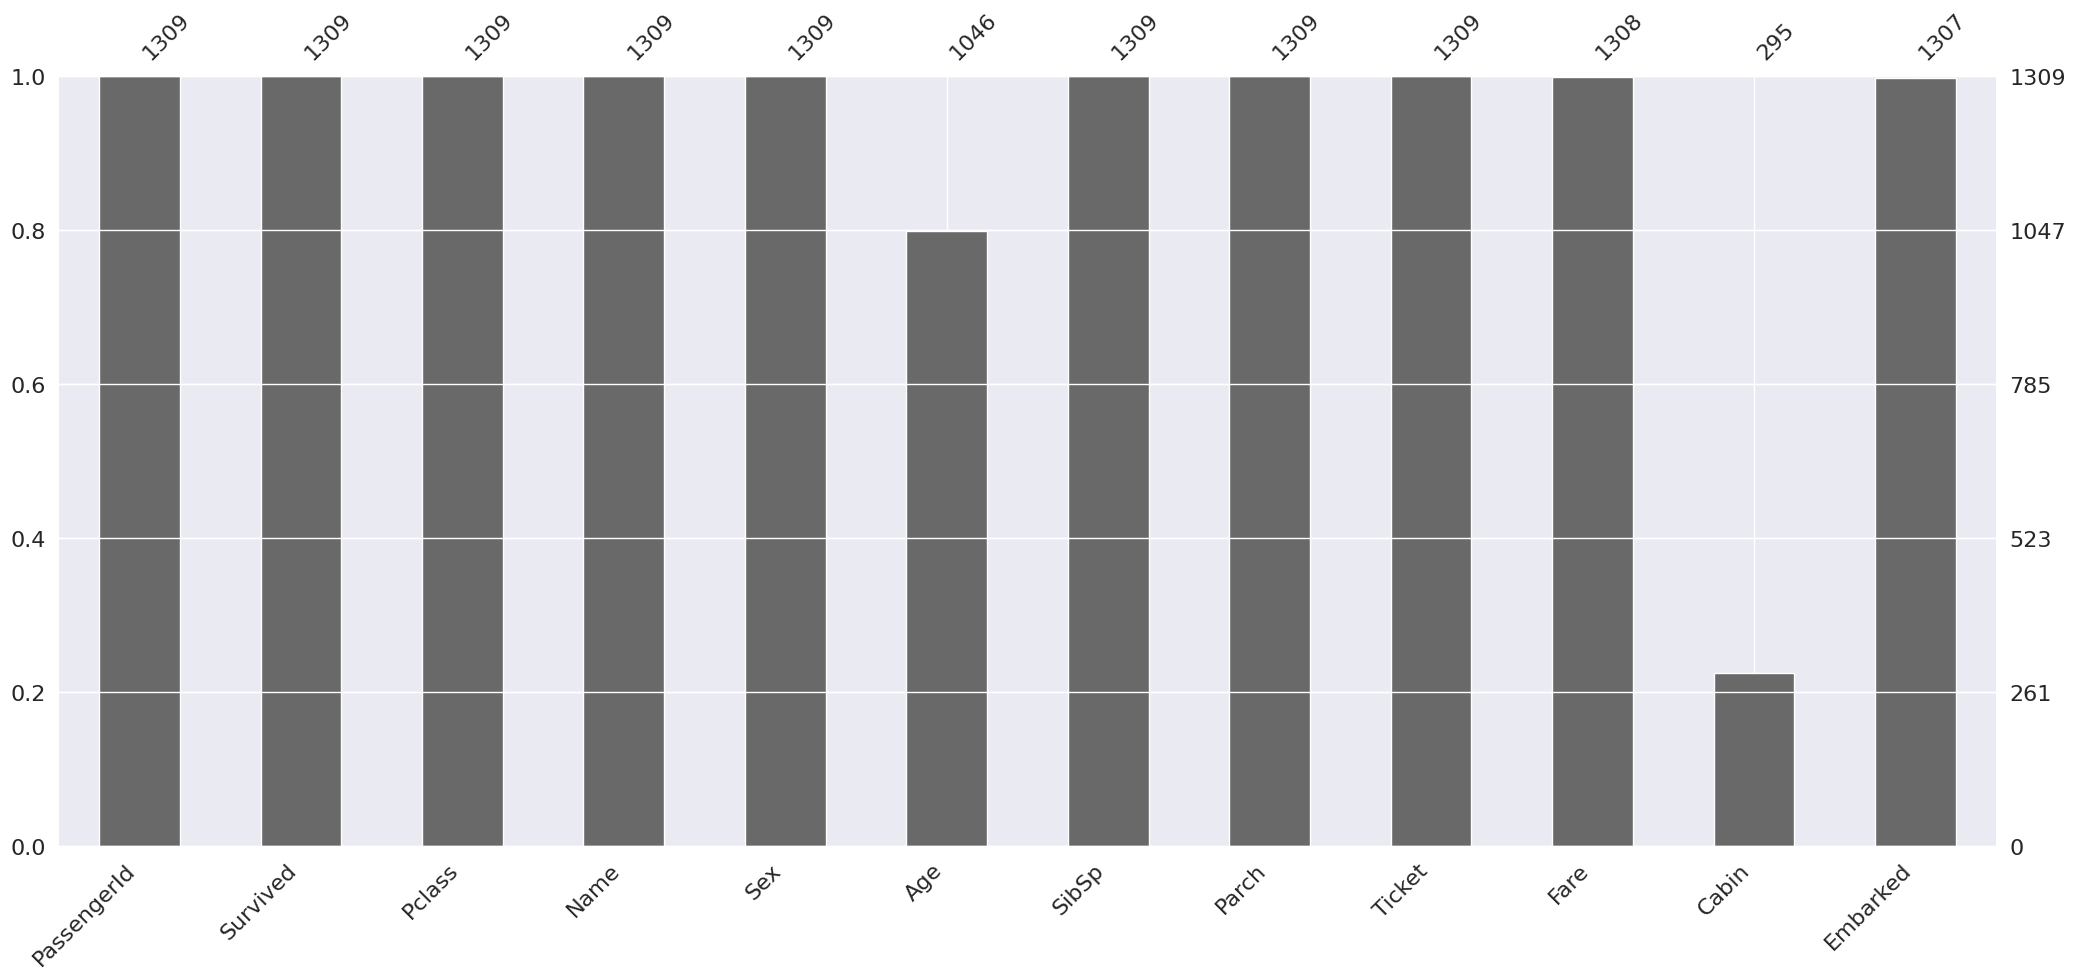

In [94]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Detect missing values
print(df.isna())
print(df.isna().sum())
print(df.isna().values.sum())
# Visualisation
msno.bar(df)


#### Dealing with missing values. Fix the missing value problem.



1.   Do analysis using plots. Fix issues.

2.   Provide an appropriate discussion




In [95]:
# Code Here (Add as many cells as you need)
nf = df.drop("Cabin", axis = 1)
med = nf["Age"].median()
nf["Age"].fillna(med, inplace = True)
mod = nf["Fare"].mode()[0]
nf["Fare"].fillna(mod, inplace = True)
nf.dropna(inplace = True)
nf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S


 ##### Discuss your findings
 => nf is new data frame with fixed missing value
dropped Cabin column because of low data.
=>filled Age column missing values with median.
=>filled Fare column with mode because of number of missing values is 2 so most frequency value can be count. 
=>finaly, print number of missing values of every column

### 2.3 Analysing Patterns using Visualisations

The data type of 'Sex' is an object, which will not be visible in a correlation. So, if we like to include the values of the column 'Sex' into the correlation matrix by creating a new column 'Sex_Number' and set the value 'female' to '1' and 'male' to '0'. 

In [96]:
# Creating a new column 'SexNo' with the values '1' for 'female' and '0' for 'male'
df['Sex_Number'] = np.where((df['Sex'] == "female"), 1, 0)
# Checking if the column 'SexNo' has been added
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#### 2.3.1 Visualization of column correlation (use groupby). Also, plot Heat Map

In [97]:
# Correlation table including the new column 'SexNo'
correlation = df.corr()
correlation

<ipython-input-97-8a10b226dc37>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Number
PassengerId,1.000000,-0.020370,-0.038354,0.028814,-0.055224,0.008942,0.031428,-0.013406
Survived,-0.020370,1.000000,-0.264710,-0.053695,0.002370,0.108919,0.233622,0.688371
Pclass,-0.038354,-0.264710,1.000000,-0.408106,0.060832,0.018322,-0.558629,-0.124617
Age,0.028814,-0.053695,-0.408106,1.000000,-0.243699,-0.150917,0.178740,-0.063645
SibSp,-0.055224,0.002370,0.060832,-0.243699,1.000000,0.373587,0.160238,0.109609
Parch,0.008942,0.108919,0.018322,-0.150917,0.373587,1.000000,0.221539,0.213125
Fare,0.031428,0.233622,-0.558629,0.178740,0.160238,0.221539,1.000000,0.185523
Sex_Number,-0.013406,0.688371,-0.124617,-0.063645,0.109609,0.213125,0.185523,1.000000


Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

**seaborn.heatmap**

Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

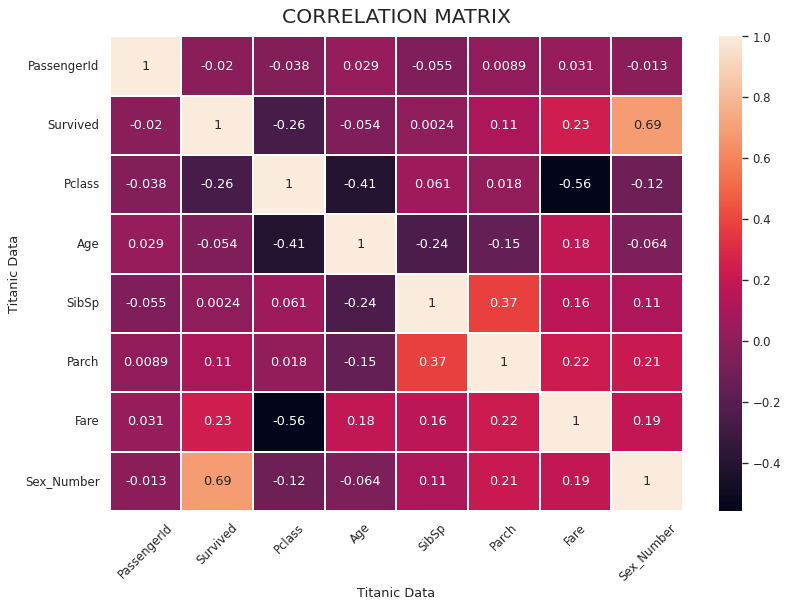

In [98]:
# Visualisation of the corralation table


plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.xticks(rotation=45)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.1)? Write in your own words in this cell.

Write below:
we understand the correlation concept. The realtion between the columns in dataframe.
Here, the relaiton between SURVIVED and SEX_NUMBER is high which is 0.69 so the correlation between them is higher than any other columns. Also the correaltion between PCLASS with Fare is most lower combination is -0.56.

#### 2.3.2 Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



##### 2.3.2.1 Sex Proportion

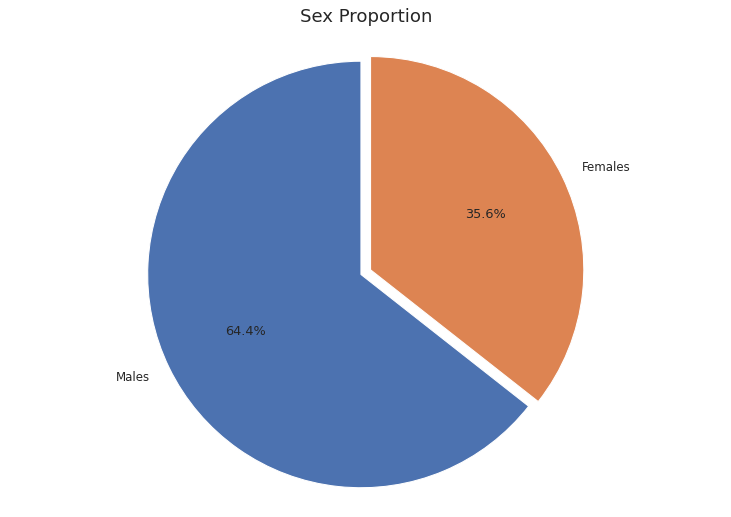

In [99]:
male = (df['Sex'] == 'male').sum()
female = (df['Sex']== 'female').sum()
proportions = [male,female]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels= ['Males', 'Females'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Sex Proportion", size=17, pad=13)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.1)? Write in your own words in this cell.

Write below: we understand that more then 64% are male and the other 35 percent was female.



##### 2.3.2.2 Age comparision of the people who survived and those who died

In [100]:
# How many people survived ('Survived' == 0)
survived_data=df.Survived.value_counts().to_frame()
survived_data


,Survived
0,815
1,494


In [101]:
pd.pivot_table(df, index="Survived", values=['Pclass','SibSp', 'Parch', 'Fare'])

,Fare,Parch,Pclass,SibSp
Survived,,,,
0,23.879124,0.311656,2.467485,0.496933
1,48.811497,0.506073,2.010121,0.502024


In [102]:
# Amount and average age of people who survived compared to those who died.
df.groupby(['Survived']).Age.agg([len,min, max,'mean', 'median'])

,len,min,max,mean,median
Survived,,,,,
0,815,0.33,74.0,30.510986,28.0
1,494,0.17,80.0,28.931079,28.0


In [103]:
fem_p1_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
fem_p1_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
fem_p1_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
fem_p1_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
fem_p2_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
fem_p2_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
fem_p2_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
fem_p2_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 3)].Age.median()
fem_p3_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
fem_p3_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
fem_p3_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
fem_p3_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
fem_p3_s4 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
fem_p3_s5 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
fem_p3_s8 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()
male_p1_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
male_p1_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
male_p1_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
male_p1_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
male_p2_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
male_p2_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
male_p2_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
male_p3_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
male_p3_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
male_p3_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
male_p3_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
male_p3_s4 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
male_p3_s5 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
male_p3_s6 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 6)].Age.median()
male_p3_s8 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()

# Filling missing values with average age of women and men in each class
def myfunc(age, pclass, sex, SibSp):
    if pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 0:
        age=fem_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 1:
        age=fem_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 2:
        age=fem_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 3:
        age=fem_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 0:
        age=fem_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 1:
        age=fem_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 2:
        age=fem_p2_s2
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 3:
        age=fem_p2_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 0:
        age=fem_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 1:
        age=fem_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 2:
        age=fem_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 3:
        age=fem_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 4:
        age=fem_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 5:
        age=fem_p3_s5  
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 8:
        age=df.Age.median()  
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 0:
        age=male_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 1:
        age=male_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 2:
        age=male_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 3:
        age=male_p1_s3      
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 0:
        age=male_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 1:
        age=male_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 2:
        age=male_p2_s2   
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 0:
        age=male_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 1:
        age=male_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 2:
        age=male_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 3:
        age=male_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 4:
        age=male_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 5:
        age=male_p3_s5
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 6:
        age=male_p3_s6
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 8:
        age=male_p3_s8 
    else:
        age=age
    return age

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [104]:
# Creating a new columns 'Age_Filled_Na' with the new average age values 
df['Age_Filled'] = df.apply(lambda x: myfunc(x['Age'], x['Pclass'], x['Sex'], x['SibSp']), axis=1)

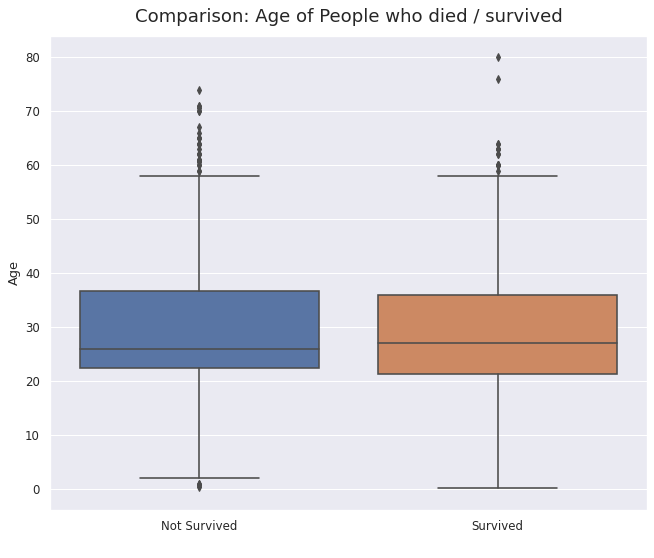

In [105]:
# Age comparision of the people who survived and those who died using a boxplot. 
plt.figure(figsize=(10,8), dpi=77)
sns.boxplot(x="Survived", y="Age_Filled", data=df)
plt.title("Comparison: Age of People who died / survived", size=17, pad=13)
plt.ylabel('Age')
plt.xlabel(' ')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.2)? Write in your own words in this cell.

Write below: visualising the data distribution of survived and not survived types. 



##### 2.3.2.3 The barplot compares the survival 

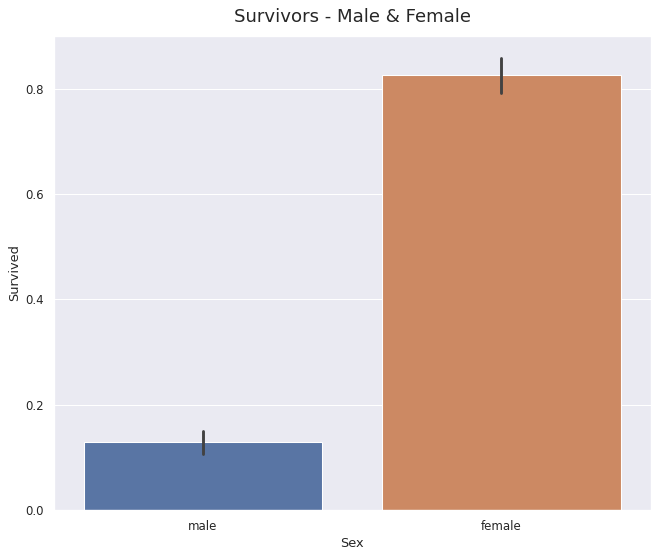

In [106]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survivors - Male & Female", size=17, pad=13 )
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.3)? Write in your own words in this cell.

Write below: The bar chart defines the relation between categorical and numeric data. In this bar chart, we can determine the relationship between SURVIVED with SEX. Here The male survival rate is much lower than the female.

##### 2.3.2.4 Comparison: Survivors - Male & Female

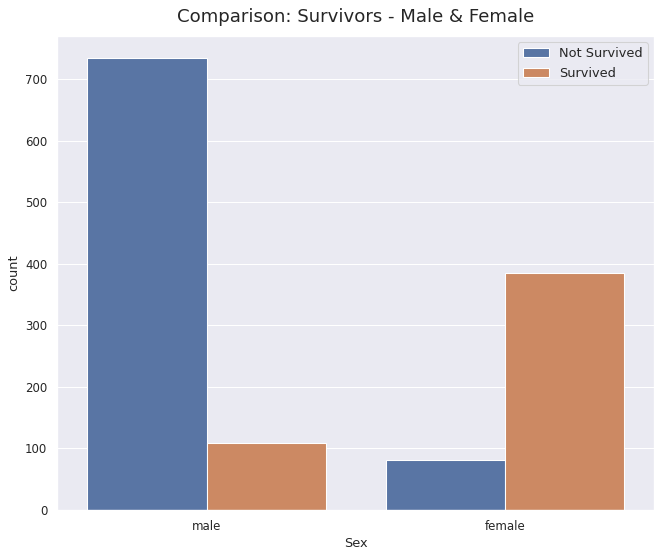

In [107]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.title("Comparison: Survivors - Male & Female", size=17, pad= 13)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.4)? Write in your own words in this cell.

Write below: Most of the male is in not survived class and most of the female is opn survived class

In [108]:
# Find percentage of women who survived
x = len(df[(df["Sex"] == "female")])
y = len(df[((df["Sex"] == "female") & (df["Survived"] == 1))])
res = y/x*100
print(round(res, 2))

82.62


In [109]:
# Find percentage of men who survived
x = len(df[(df["Sex"] == "male")])
y = len(df[((df["Sex"] == "male") & (df["Survived"] == 1))])
res = y/x*100
print(round(res, 2))

12.93


##### 2.3.2.5 Compares the chance of survival for each ticket class

In [110]:
print(df['Pclass'].value_counts())

3    709
1    323
2    277
Name: Pclass, dtype: int64


In [111]:
df.groupby(['Pclass', 'Survived']).Age.agg([len])

len
Pclass Survived     
1      0         137
       1         186
2      0         160
       1         117
3      0         518
       1         191

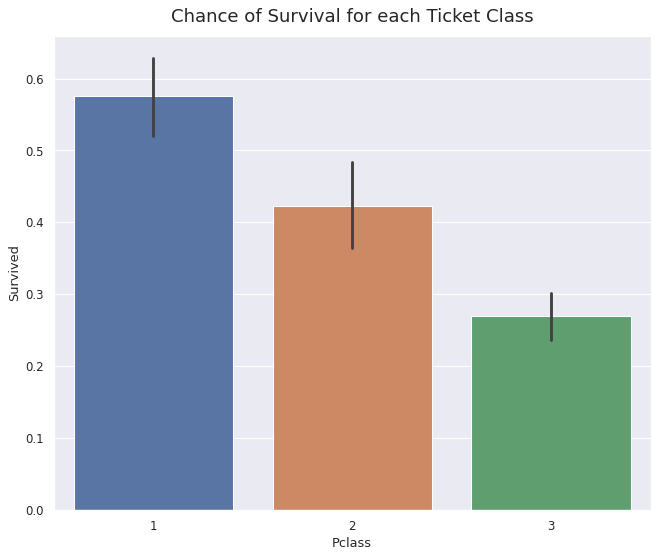

In [112]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Chance of Survival for each Ticket Class", size=17, pad=13)
plt.show()

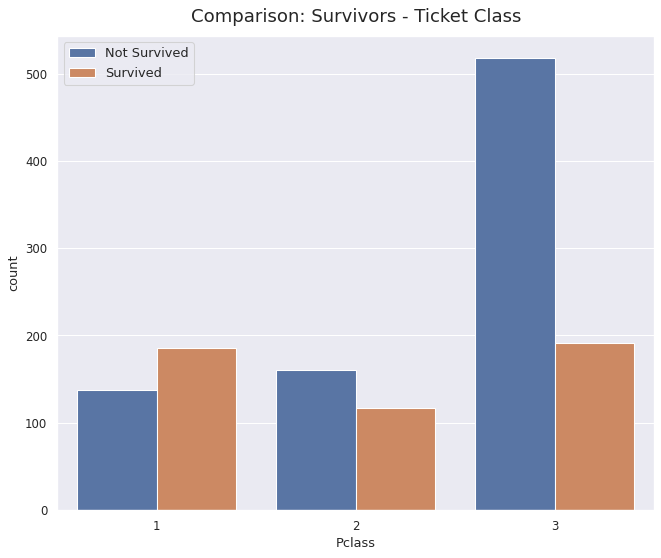

In [113]:
# Survived and not survived compared for each ticket class
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.title("Comparison: Survivors - Ticket Class", size=17, pad=13)
plt.legend(['Not Survived', 'Survived'], loc='upper left', prop={'size': 12})
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.5)? Write in your own words in this cell.

Write below: Here we know the concept of group by, len, aggreagate.

##### 2.3.2.6 Chance of Survival for Passengers with Parents or Children

In [114]:
# Amount and average age of women and man of each class who survived compared to those who died.
df.groupby(['Sex','Survived', 'Pclass']).Age.agg([len,min, max,'mean'])

len    min   max       mean
Sex    Survived Pclass                             
female 0        1         3   2.00  50.0  25.666667
                2         6  24.00  57.0  36.000000
                3        72   2.00  48.0  23.818182
       1        1       141  14.00  76.0  37.300000
                2       100   0.92  60.0  26.973402
                3       144   0.17  63.0  21.259485
male   0        1       134   6.00  71.0  42.752252
                2       154   2.00  70.0  32.367133
                3       446   0.33  74.0  26.412894
       1        1        45   0.92  80.0  36.248000
                2        17   0.67  62.0  16.022000
                3        47   0.42  45.0  22.274211

In [115]:
df['Parch'].value_counts().to_frame()

,Parch
0,1002
1,170
2,113
3,8
5,6
4,6
6,2
9,2


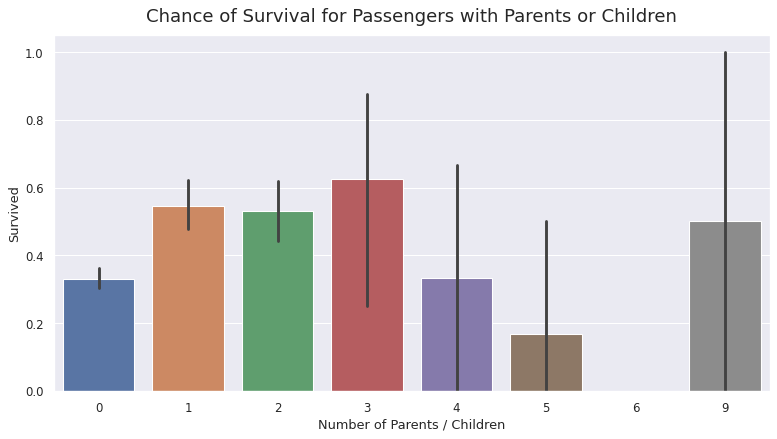

In [116]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Parents or Children", size=17, pad=13)
plt.xlabel('Number of Parents / Children')
plt.show()

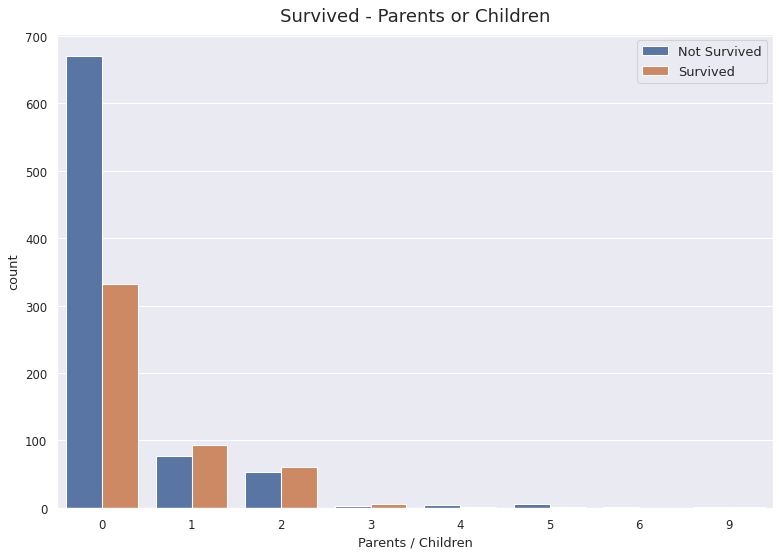

In [117]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.title("Survived - Parents or Children", size=17, pad=12)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xlabel('Parents / Children')
plt.show()

In [118]:
# Age of people with parents or children
df.groupby(['Parch','Survived']).Age.agg([len, min, max])

len    min   max
Parch Survived                  
0     0         670  11.00  74.0
      1         332   5.00  80.0
1     0          77   0.75  70.0
      1          93   0.42  64.0
2     0          53   0.33  58.0
      1          60   0.17  64.0
3     0           3  16.00  61.0
      1           5  24.00  54.0
4     0           4  29.00  64.0
      1           2  60.00  60.0
5     0           5  39.00  41.0
      1           1  38.00  38.0
6     0           2  40.00  43.0
9     0           1    NaN   NaN
      1           1    NaN   NaN

 What do you undersend/find from the analysis above (section 2.3.2.6)? Write in your own words in this cell.

Write below: The relation between Parch and Survived.

##### 2.3.2.7 This barplot compares the chance of survival within a category

In [119]:
df.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [120]:
df.groupby(['SibSp','Survived']).Age.agg([len, 'mean'])

len       mean
SibSp Survived                
0     0         593  31.603537
      1         298  29.689549
1     0         153  33.509398
      1         166  28.840204
2     0          23  23.950000
      1          19  23.093750
3     0          15  11.181818
      1           5  27.600000
4     0          18   7.222222
      1           4  15.750000
5     0           5  10.200000
      1           1  10.000000
8     0           8  14.500000
      1           1        NaN

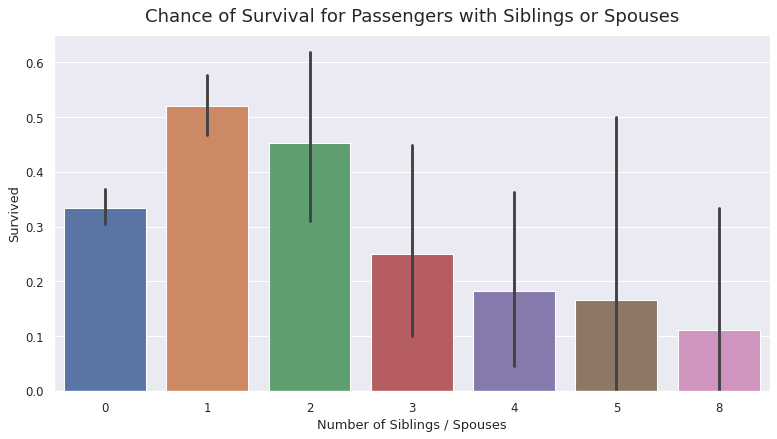

In [121]:
# This barplot compares the chance of survival within a category
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Siblings or Spouses", size=17, pad=13)
plt.xlabel('Number of Siblings / Spouses')
plt.show()

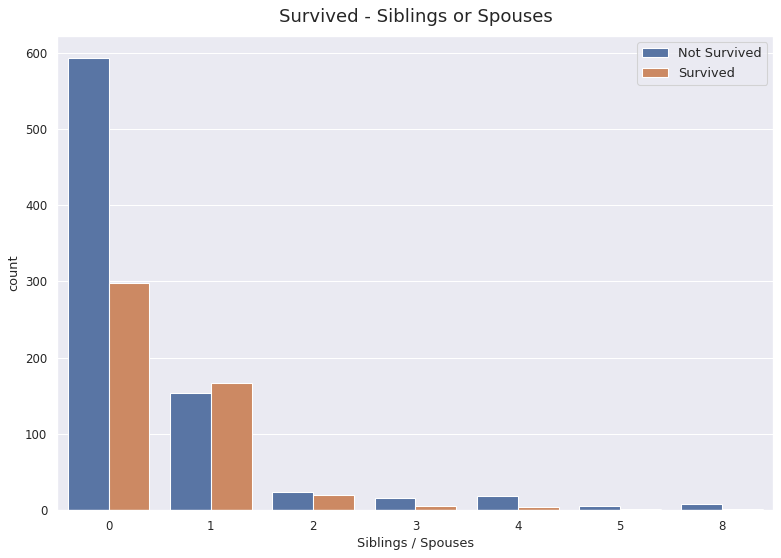

In [122]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.title("Survived - Siblings or Spouses", size=17, pad=13)
plt.xlabel('Siblings / Spouses')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

In [123]:
df.groupby(['SibSp','Survived']).Age.agg([len, min, max, 'mean'])

len    min   max       mean
SibSp Survived                             
0     0         593   0.33  74.0  31.603537
      1         298   0.42  80.0  29.689549
1     0         153   0.75  70.0  33.509398
      1         166   0.17  76.0  28.840204
2     0          23   9.00  44.0  23.950000
      1          19   0.75  59.0  23.093750
3     0          15   2.00  31.0  11.181818
      1           5  23.00  33.0  27.600000
4     0          18   1.00  16.0   7.222222
      1           4   3.00  38.0  15.750000
5     0           5   1.00  16.0  10.200000
      1           1  10.00  10.0  10.000000
8     0           8  14.50  14.5  14.500000
      1           1    NaN   NaN        NaN

 What do you undersend/find from the analysis above (section 2.3.2.7)? Write in your own words in this cell.

Write below: The relation between Sibling and Survived.

##### 2.3.2.8 Chance of Survival by Port of Embarkation

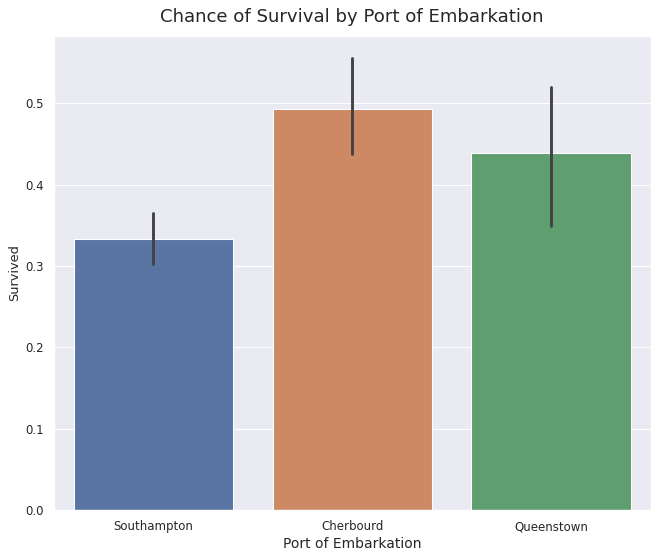

In [124]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title('Chance of Survival by Port of Embarkation', size=17, pad=13)
plt.xlabel('Port of Embarkation', size=13)
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

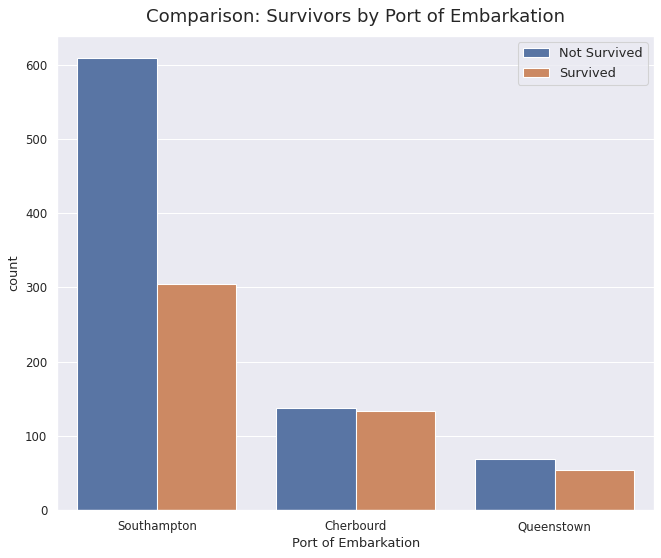

In [125]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Embarked'],hue=df['Survived'])
plt.title("Comparison: Survivors by Port of Embarkation", size=17, pad=13)
plt.xlabel('Port of Embarkation')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.8)? Write in your own words in this cell.

Write below: The relation between Embarkation and Survived.

##### 2.3.2.9 Average Age of Passengers with Siblings and  Parents or Children

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


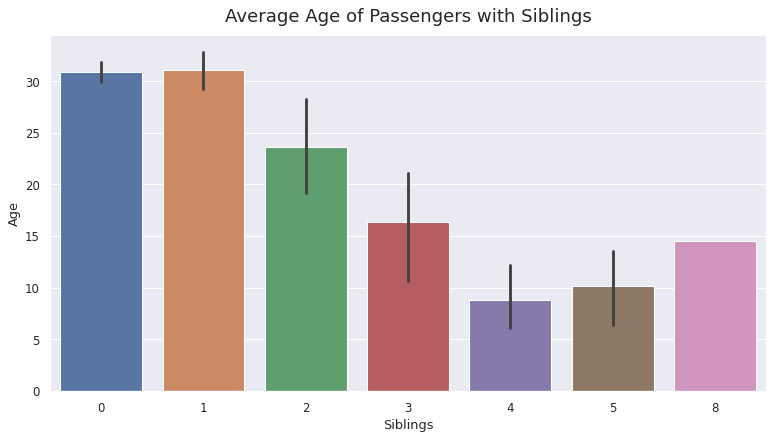

In [126]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Age", data=df)
plt.title('Average Age of Passengers with Siblings', size=17, pad=13)
plt.xlabel('Siblings')
plt.show()

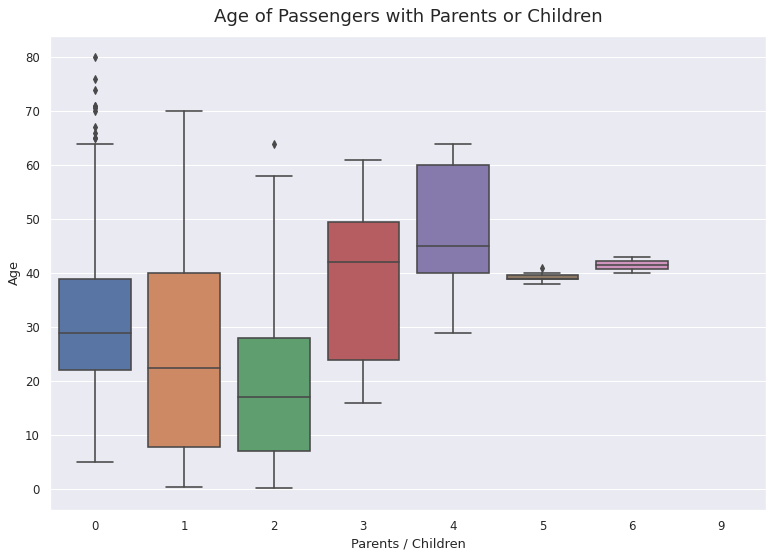

In [127]:
plt.figure(figsize=(12,8), dpi=77)
sns.boxplot(x="Parch", y="Age", data=df)
plt.title('Age of Passengers with Parents or Children', size=17, pad=13)
plt.xlabel('Parents / Children')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


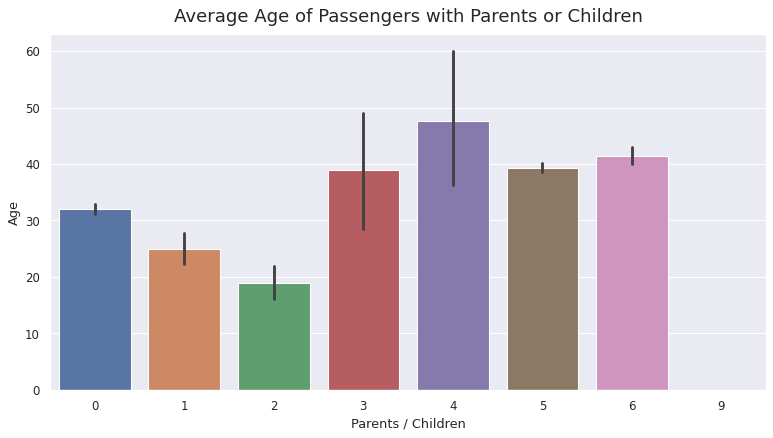

In [128]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Age", data=df)
plt.title('Average Age of Passengers with Parents or Children', size=17, pad=12)
plt.xlabel('Parents / Children')
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.9)? Write in your own words in this cell.

Write below: The relation between Avarage Age with Having Parents or children.

##### 2.3.2.10 Age of Passengers for each Ticket Class

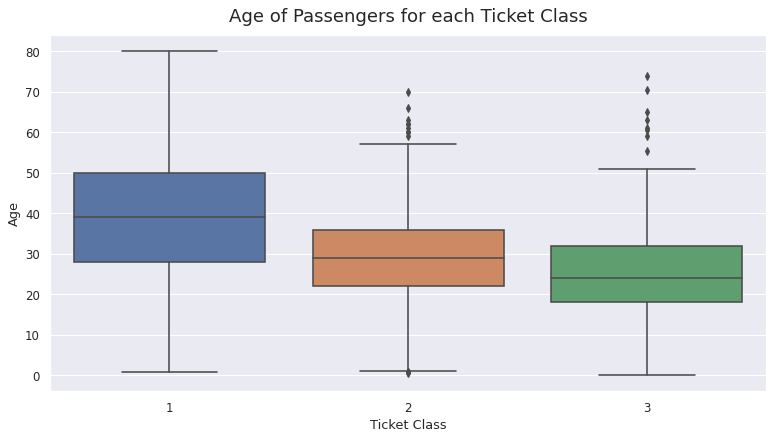

In [129]:
plt.figure(figsize=(12,6), dpi=77)
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title('Age of Passengers for each Ticket Class', size=17, pad=13)
plt.xlabel('Ticket Class')
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.10)? Write in your own words in this cell.

Write below: The relation between Avarage Age with Having Parents or children with box plot.

##### 2.3.2.11 Comparing multiple columns

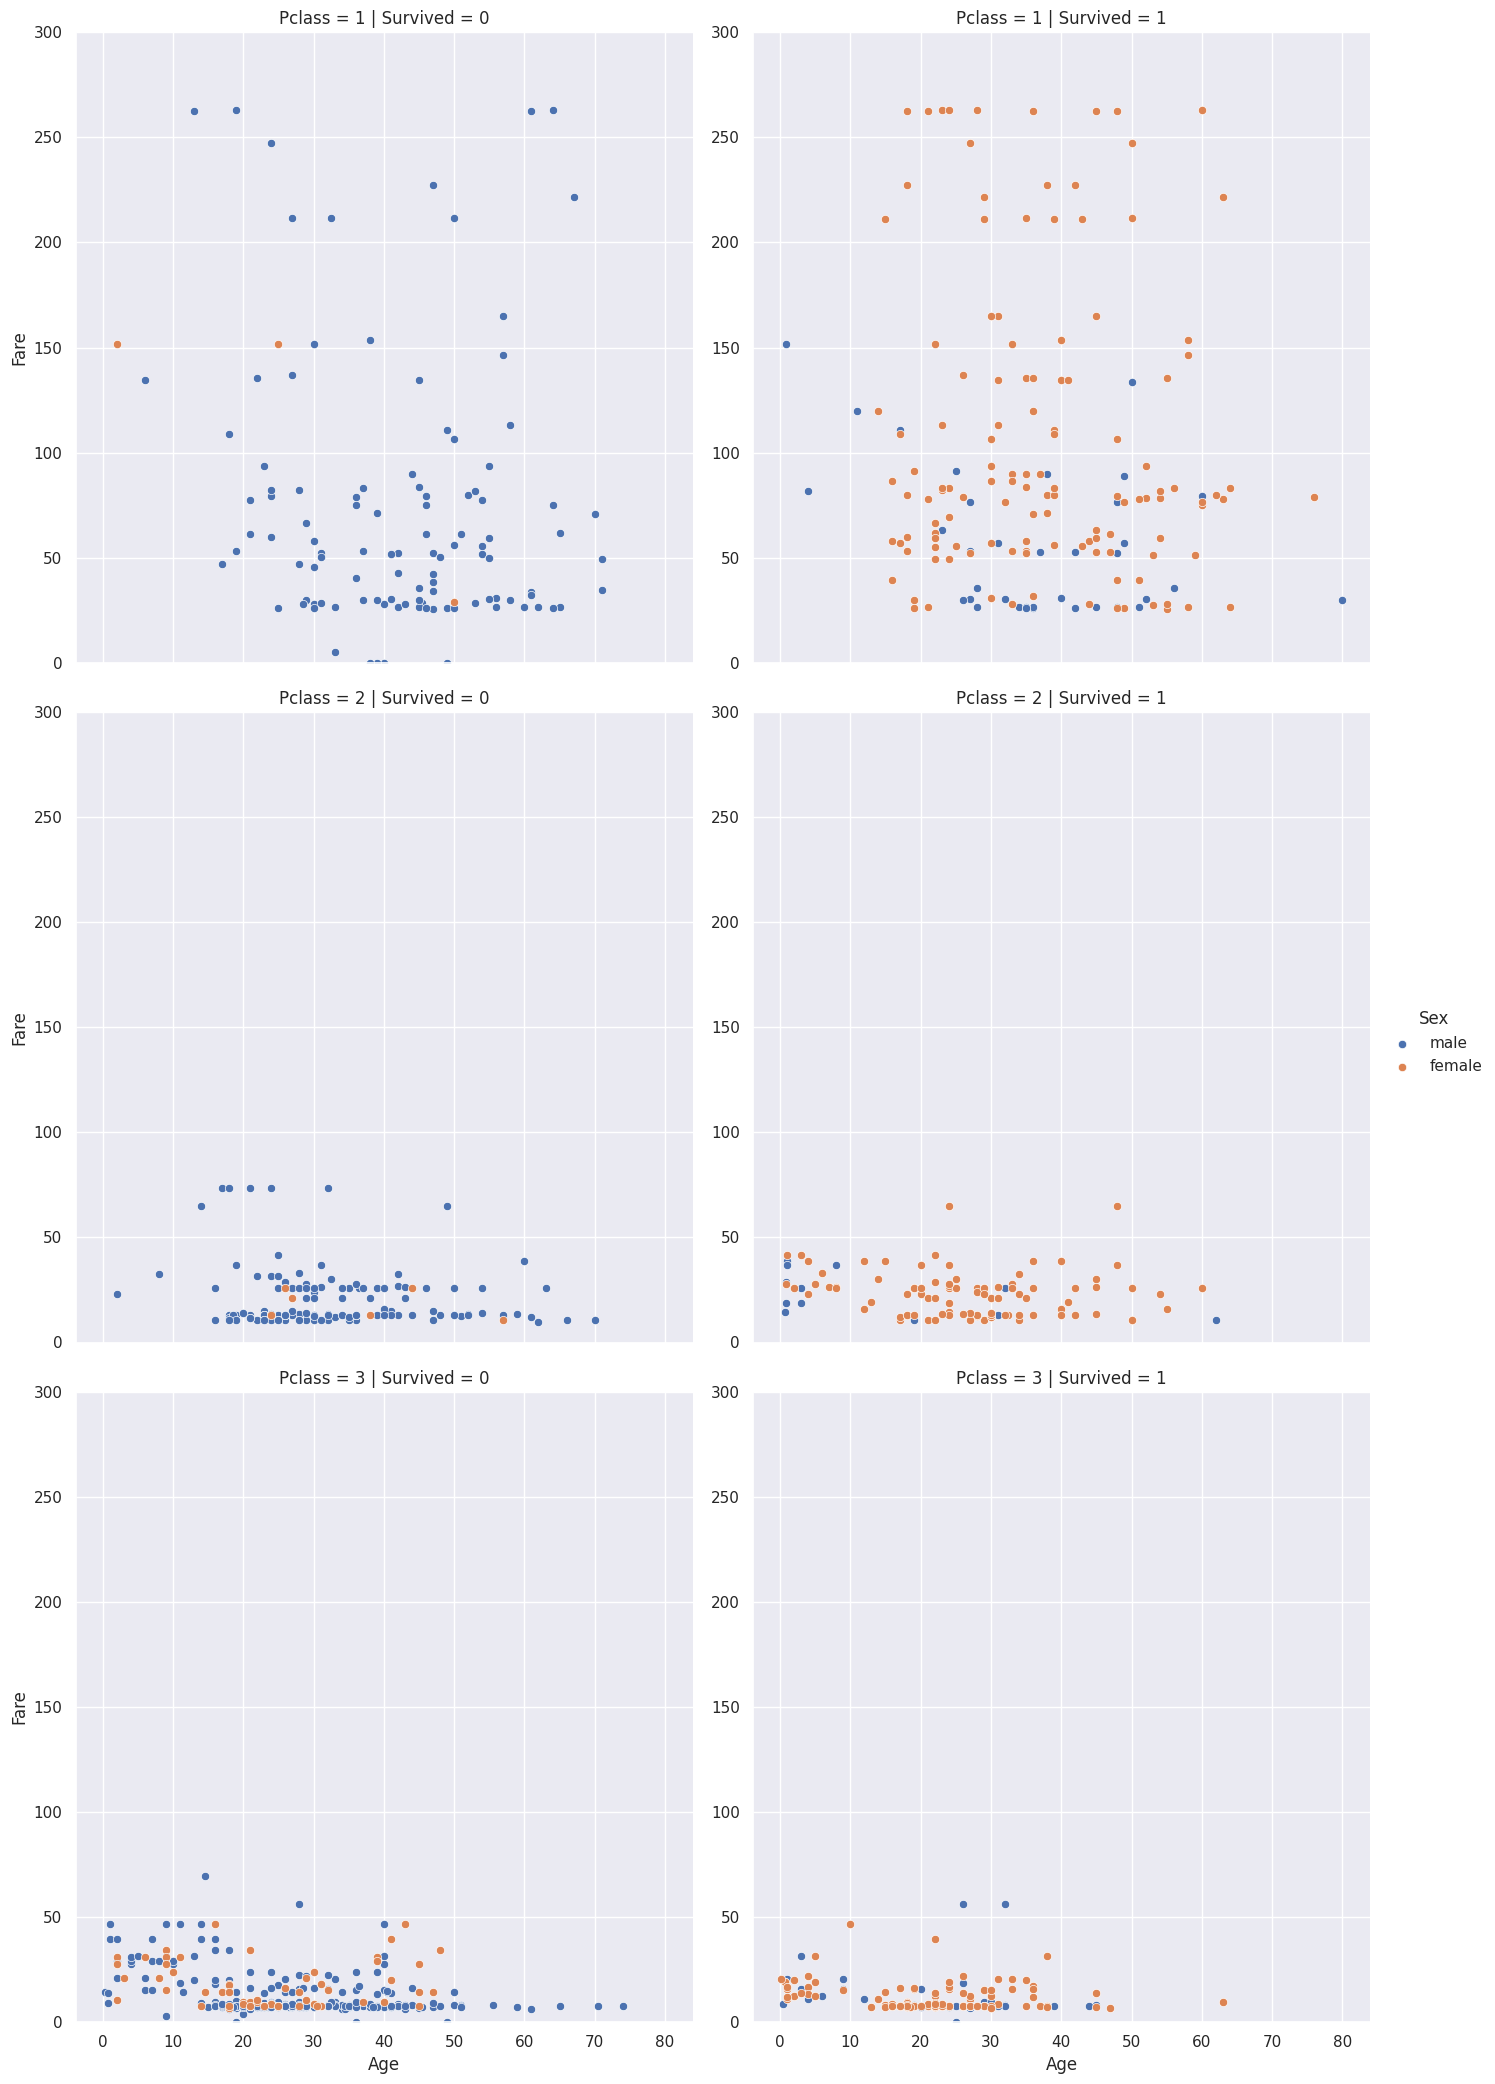

In [130]:
# Comparison of Pclass, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='Pclass', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

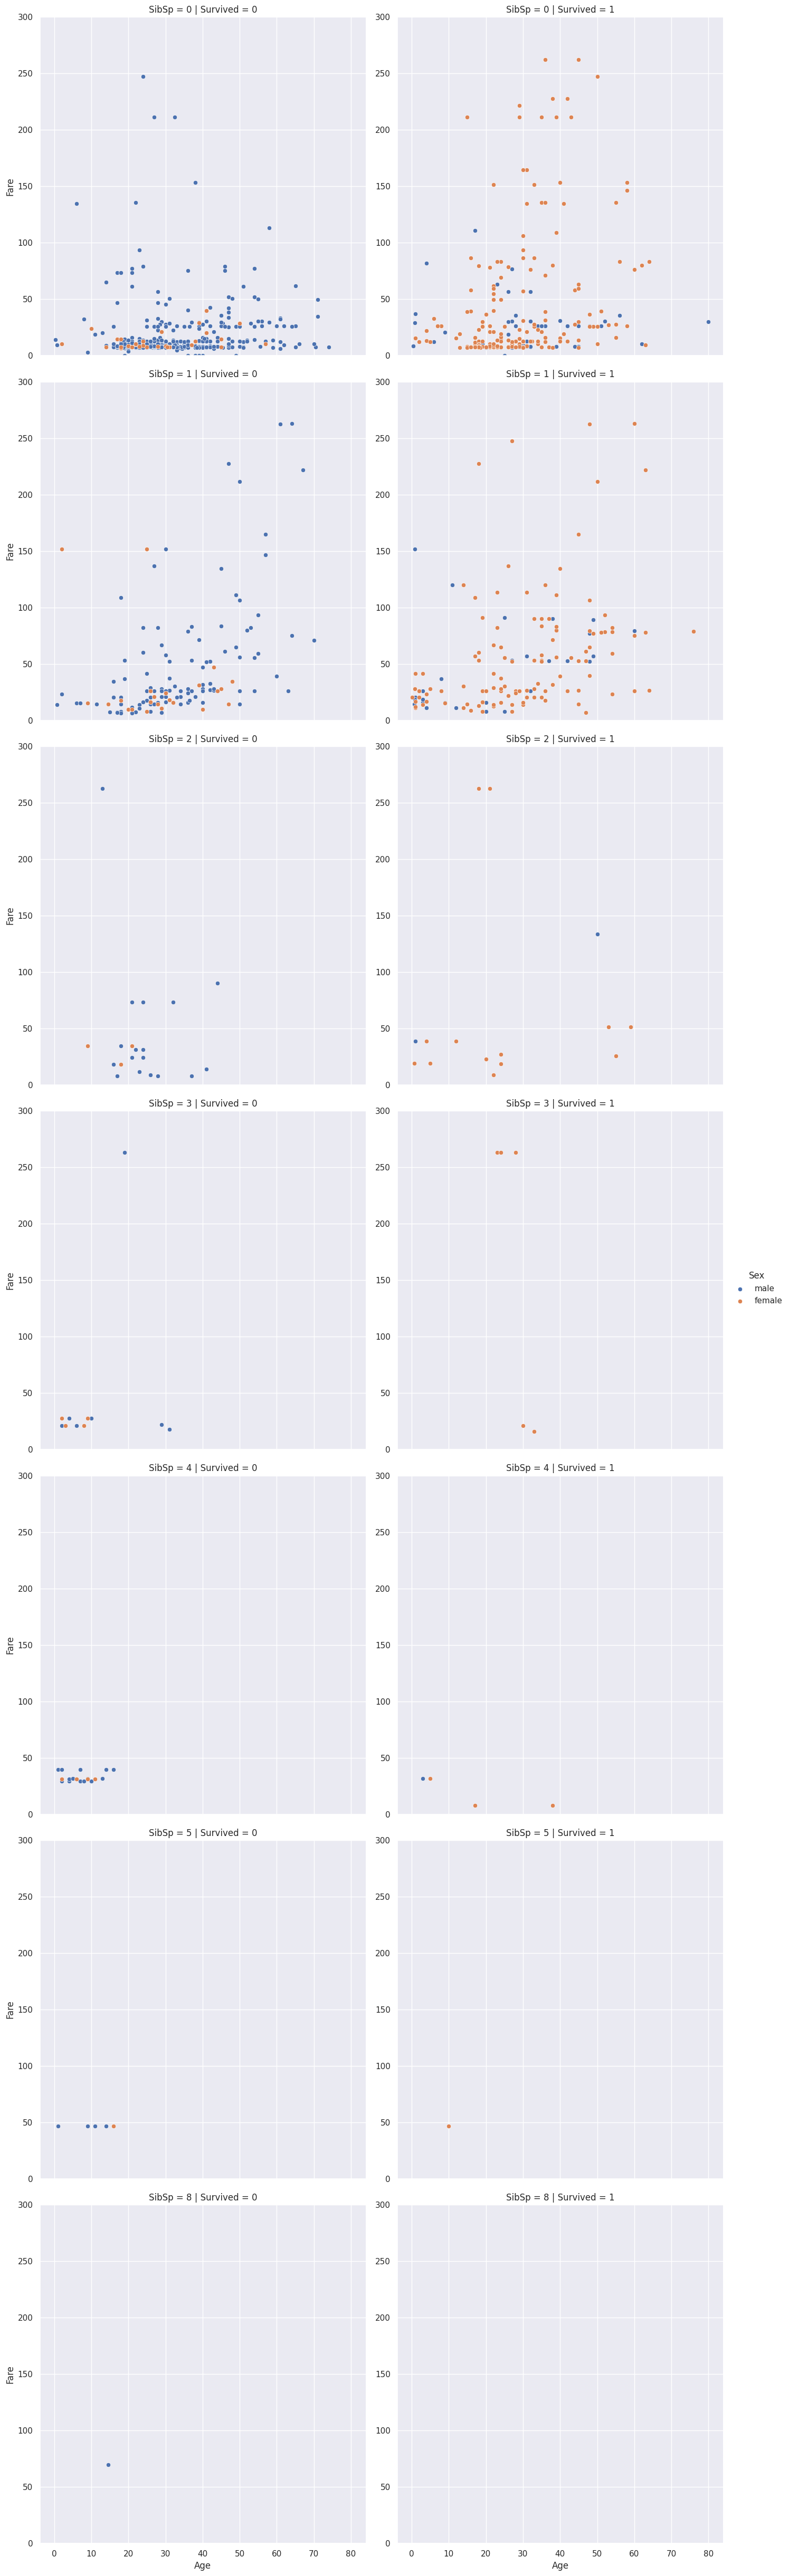

In [131]:
# Comparison of Parch, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='SibSp', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

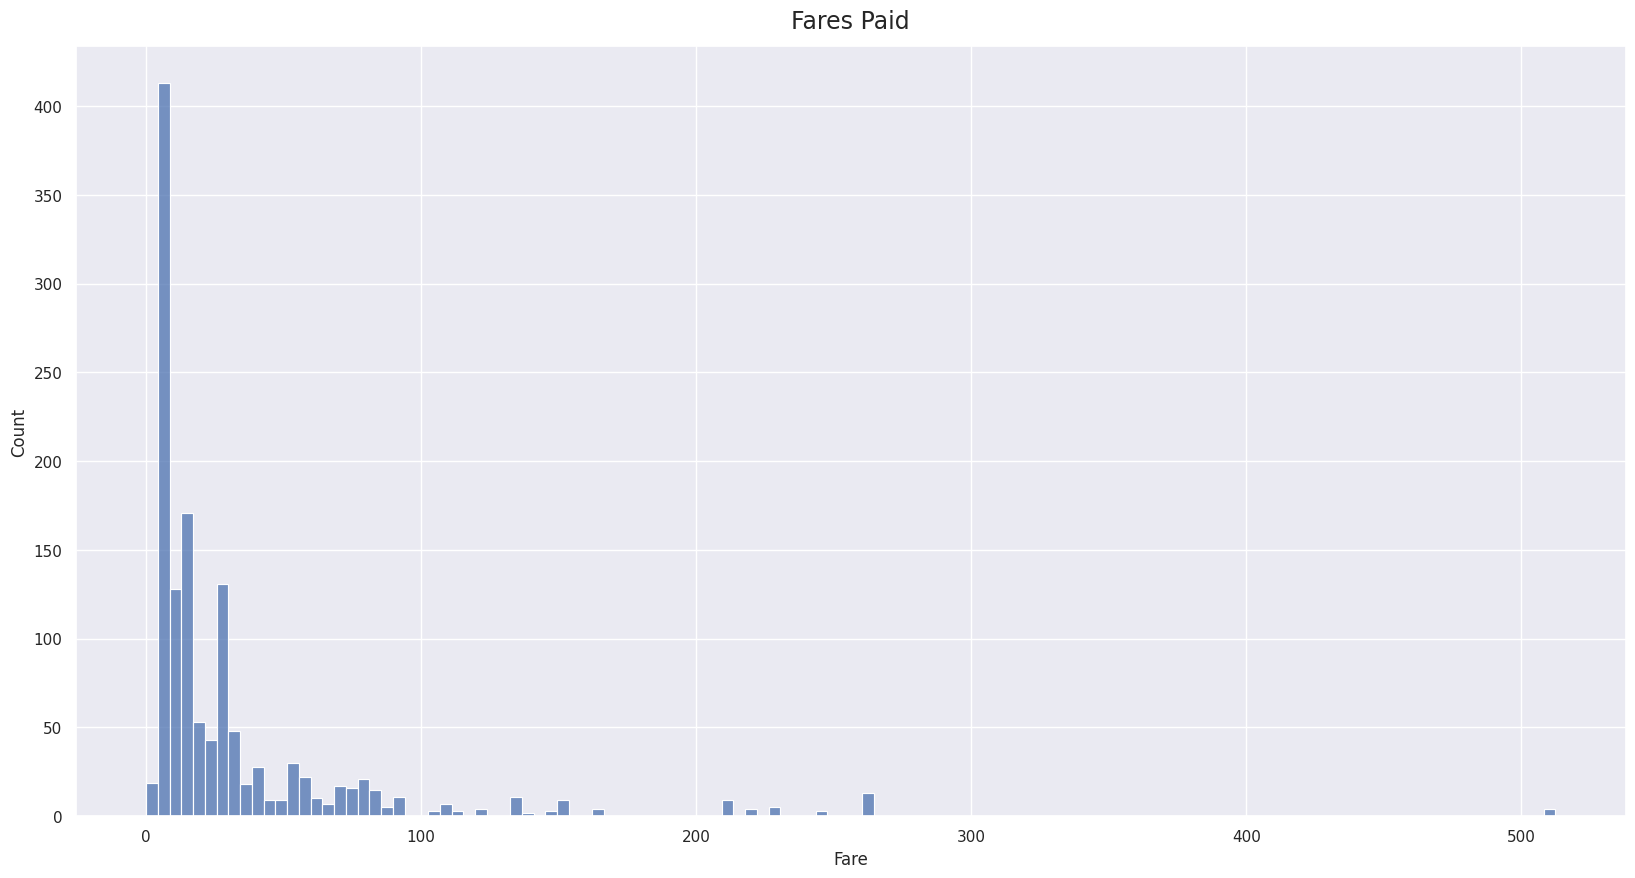

In [132]:
plt.figure(figsize=(20,10))
sns.histplot(df.Fare)
plt.title('Fares Paid', size=17, pad=13)
plt.show()

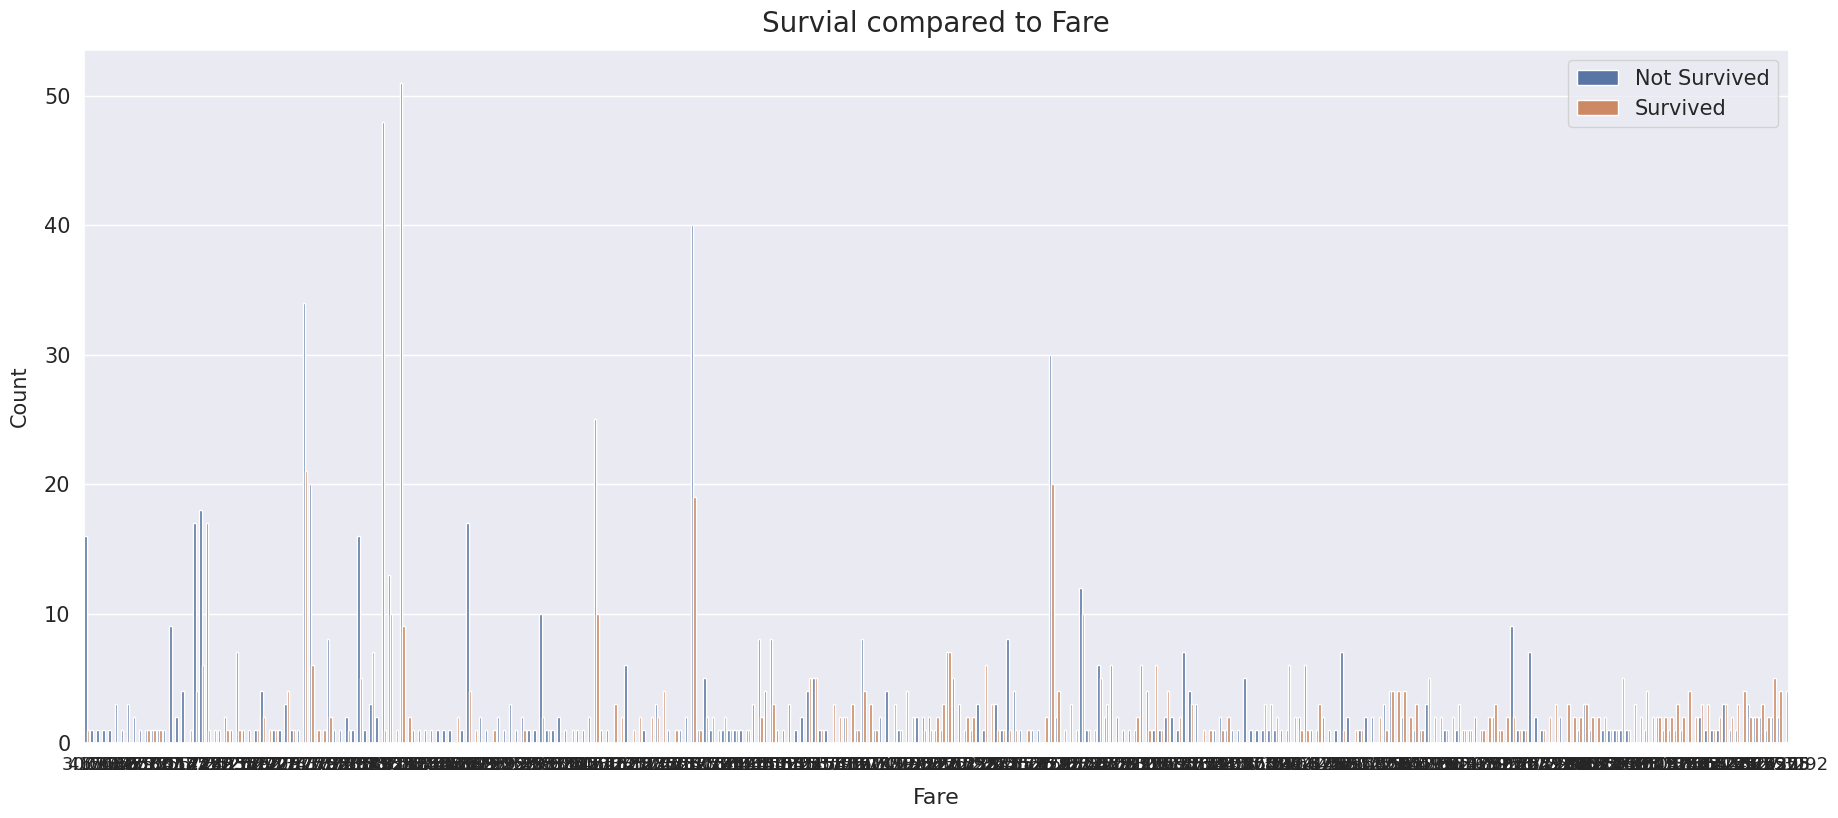

In [133]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df)
plt.xlabel('Fare', size=16, labelpad=10)
plt.ylabel('Count', size=15, labelpad=10)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=15)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survial compared to Fare', size=20, y=1, pad=13)
plt.show()

 What do you undersend/find from the analysis above (section 2.3.2.11)? Write in your own words in this cell.

Write below: Here, We understood bar plot , histogram, Scatterplot

## 3. Data Preprocessing

Explain your data preprocessing steps including filling null values, dropping duplicates, encoding, dimensionality reduction etc. whichever is applicable. Appropriate data preprocessing can hugely impact your model’s performance.

For encoding categorical variables you can use pandas (get_dummies).

Convert categorical variable into dummy/indicator variables.

Learn More:


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

**Examples**


In [134]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [135]:
train1 = train_data.copy()


train1.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)


train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [136]:
data1 = train1.copy()
print(data1.dtypes)

data1 = pd.get_dummies(data1)

data1.head()


Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


**Now use the given dataset and perform the data preprocessing steps:**

In [137]:
# Code Here (Add as many cells as you need)

data1.drop_duplicates(inplace = True)
med = data1["Age"].median()
data1.fillna(med, inplace = True)
data1
print(data1.isna().sum())

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


### **Write Here**

 What do you undersend/find from the analysis above (section 3)? Write in your own words in this cell.



## 4.	Machine Learning Models



1.   Develop machine learning models. 
2.   You may try changing different parameters to obtain better training 
accuracy.
3. At least two models (with different parameters)



Provide a brief description of the machine learning models you used. (Provide a detailed description of their parameter)

Don’t copy-paste directly from the Internet! Write in your own words.

### 4.1 Use Logistic regression to build your ML model for the Titanic dataset.

At least two models (with different parameters). Hints: use the default parameters for one model and tuned-up (intuitively) parameter for improving accuracy.


(585, 10)
[[-1.04538322 -0.04415222 -0.25565164 -0.08893555  0.00295077  1.28554602
  -1.27945275 -0.00532387 -0.07097912 -0.19846769]]
[3.6636075]
probabilities : [[0.83042692 0.16957308]
 [0.85104967 0.14895033]
 [0.62891459 0.37108541]
 [0.26510902 0.73489098]
 [0.88230429 0.11769571]
 [0.33800092 0.66199908]
 [0.88753179 0.11246821]
 [0.49735627 0.50264373]
 [0.65958814 0.34041186]
 [0.89684356 0.10315644]
 [0.05525892 0.94474108]
 [0.95828641 0.04171359]
 [0.76635033 0.23364967]
 [0.42582887 0.57417113]
 [0.42034142 0.57965858]
 [0.95095608 0.04904392]
 [0.03646843 0.96353157]
 [0.18640307 0.81359693]
 [0.88357292 0.11642708]
 [0.69450075 0.30549925]
 [0.21418468 0.78581532]
 [0.20997986 0.79002014]
 [0.54964616 0.45035384]
 [0.88401051 0.11598949]
 [0.4668893  0.5331107 ]
 [0.92844384 0.07155616]
 [0.95746335 0.04253665]
 [0.04625655 0.95374345]
 [0.92764416 0.07235584]
 [0.49271197 0.50728803]
 [0.94653154 0.05346846]
 [0.11528112 0.88471888]
 [0.14632682 0.85367318]
 [0.8069770

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


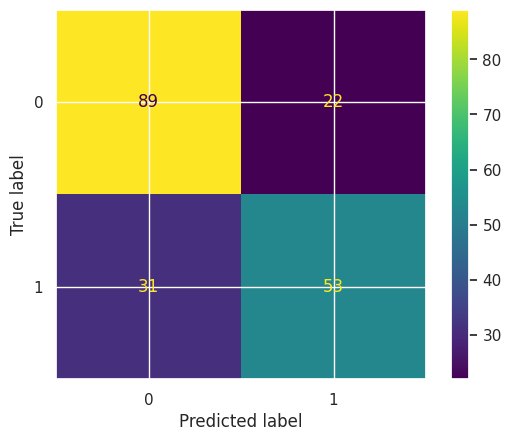

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       111
           1       0.71      0.63      0.67        84

    accuracy                           0.73       195
   macro avg       0.72      0.72      0.72       195
weighted avg       0.73      0.73      0.73       195



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters:  {'C': 0.1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score:  0.7880341880341881


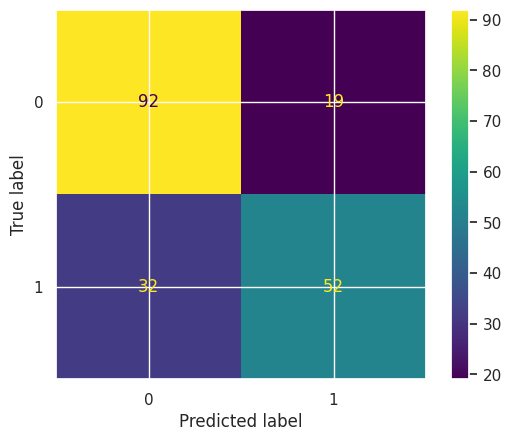

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       111
           1       0.73      0.62      0.67        84

    accuracy                           0.74       195
   macro avg       0.74      0.72      0.73       195
weighted avg       0.74      0.74      0.73       195



In [138]:
# Code Here (Add as many cells as you need)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

X = data1[["Pclass", "Age","SibSp",	"Parch",	"Fare",	"Sex_female",	"Sex_male",	"Embarked_C",	"Embarked_Q",	"Embarked_S" ]]
y = data1[["Survived"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)
print(X_train.shape)

# Using default Parameter

regressor = LogisticRegression(max_iter=500)
regressor.fit(X_train, y_train)

print(regressor.coef_)
print(regressor.intercept_)

probs = regressor.predict_proba(X_test)
print("probabilities :",probs)

ypred = regressor.predict(X_test)
print("Predicted values:", ypred)

cm = confusion_matrix(y_test, ypred, labels= regressor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=regressor.classes_)
disp.plot()

plt.show()

r= classification_report(y_test, ypred)
print(r)

# Using tuned Parameter

param_grid = {'penalty' : ['l2'],
              'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100],
              'solver' : ['lbfgs','newton-cg','sag','saga'],
              'max_iter' : [5000]}


lr = LogisticRegression()

grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train.values.ravel())

# Get best estimator from grid search
lr_best = grid_search.best_estimator_

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

y_pred = lr_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels= lr_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_best.classes_)
disp.plot()

plt.show()

r= classification_report(y_test, y_pred)
print(r)


**Write Here**

What do you undersend this above (section 4.1)? Write in your own words in this cell.

### 4.2 First analyse the 'Advertising dataset' as like you have observed in Titanic dataset. Then, use Linear Regression to build your ML model for the Advertising dataset. 

At least two models (with different parameters). Hints: use the default parameters for one model and tuned-up (intuitively) parameter for improving accuracy. 


In [139]:
# Code Here (Add as many cells as you need)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
advertise = pd.read_csv("/content/drive/My Drive/303_project_data/advertising.csv")
X = advertise[["TV", "Radio", "Newspaper" ]]
y = advertise[["Sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(y_train.shape)

# Using default Parameter

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(regressor.coef_)
print(regressor.intercept_)

ypred = regressor.predict(X_test)
print("Predicted values:", ypred)

mae = metrics.mean_absolute_error(y_test, ypred)
mse = metrics.mean_squared_error(y_test, ypred)
r2 = metrics.r2_score(y_test, ypred)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is %.2f'% mae)
print('MSE is %.2f'% mse)
print('R2 score is %.2f'% r2)



linr = LinearRegression()
param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False]}
grid = GridSearchCV(linr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
model = grid.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predicted values:", y_pred)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is %.2f'% mae)
print('MSE is %.2f'% mse)
print('R2 score is %.2f'% r2)




(150, 1)
[[ 5.34530806e-02  1.10417563e-01 -4.37125135e-05]]
[4.72863089]
Predicted values: [[10.69034418]
 [ 8.68132435]
 [ 9.59290052]
 [24.88241319]
 [14.68606352]
 [ 8.36077587]
 [10.5898131 ]
 [18.36838345]
 [ 9.87359003]
 [17.86306812]
 [23.40835973]
 [10.69153461]
 [13.38610616]
 [17.09651474]
 [11.7596204 ]
 [13.31736836]
 [21.13410725]
 [ 9.13820326]
 [14.17420598]
 [18.85121771]
 [24.84655353]
 [12.43749806]
 [16.57128353]
 [13.79857232]
 [ 7.80827038]
 [15.12861077]
 [14.68386733]
 [20.66548775]
 [16.96644118]
 [ 8.90614184]
 [12.38904935]
 [20.8124535 ]
 [21.26609738]
 [21.84309375]
 [ 7.18768267]
 [ 7.06323314]
 [ 9.23756125]
 [15.58290474]
 [13.29684701]
 [ 7.27825284]
 [10.96029997]
 [ 9.12857882]
 [15.60175994]
 [18.20653066]
 [18.8457611 ]
 [13.48625496]
 [ 5.42016056]
 [10.45332757]
 [15.51862918]
 [10.94769952]]
The model performance for testing set
--------------------------------------
MAE is 1.34
MSE is 3.96
R2 score is 0.87
Predicted values: [[10.69034418]
 [ 8.6

**Write Here**

What do you undersend this above (section 4.2)? Write in your own words in this cell.

## 5.	Performance Evaluation and Discussion

Use charts and figures appropriately to visualize and compare the performance of different models (for both the dataset, provide seperate comparison). Add as many cells as you need.

\

Analyze the performance of the models and provide your hypothesis behind their performance, e.g. Why are some models performing better than others? Provide appropriate reasoning for your hypothesis. 

In [140]:
# Code Here (Add as many cells as you need)

### **Write Here**

# **Part B (Analysis of the Dataset(s) assigned to your group)**



## 1. Provide an overview of the Dataset including the Dataset Characteristics and Exploratory Data Analysis, Data Preprocessing, and performance of different models. 

**Write Here**

## 2.	Dataset Characteristics and Exploratory Data Analysis

In this section, introduce your dataset. Mention number of rows, columns and other characteristics. Provide the histograms of data distribution and correlations among the variable with a suitable discussion. Try to stand out and be creative. (Add as many cells as you need)

### 2.1 Load, View Data and Show Analysis on Rows and Columns 

In [141]:
# Code Here (Add as many cells as you need)
pdf = pd.read_csv("/content/drive/My Drive/303_project_data/PDFMalware2022.csv")

### 2.2 Data Cleaning









#### Identifying duplicate values


In [142]:
# Code Here (Add as many cells as you need)
print(pdf.duplicated())
print(pdf.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
10021    False
10022    False
10023    False
10024    False
10025    False
Length: 10026, dtype: bool
0


#### Identifying missing values


In [143]:
# Code Here (Add as many cells as you need)
print(pdf.isna().values.sum())
print(pdf.isna())


74
       Fine name  pdfsize  metadata size  pages  xref Length  \
0          False    False          False  False        False   
1          False    False          False  False        False   
2          False    False          False  False        False   
3          False    False          False  False        False   
4          False    False          False  False        False   
...          ...      ...            ...    ...          ...   
10021      False    False          False  False        False   
10022      False    False          False  False        False   
10023      False    False          False  False        False   
10024      False    False          False  False        False   
10025      False    False          False  False        False   

       title characters  isEncrypted  embedded files  images   text  header  \
0                 False        False           False   False  False   False   
1                 False        False           False   False  False   

#### Visualisation of missing data


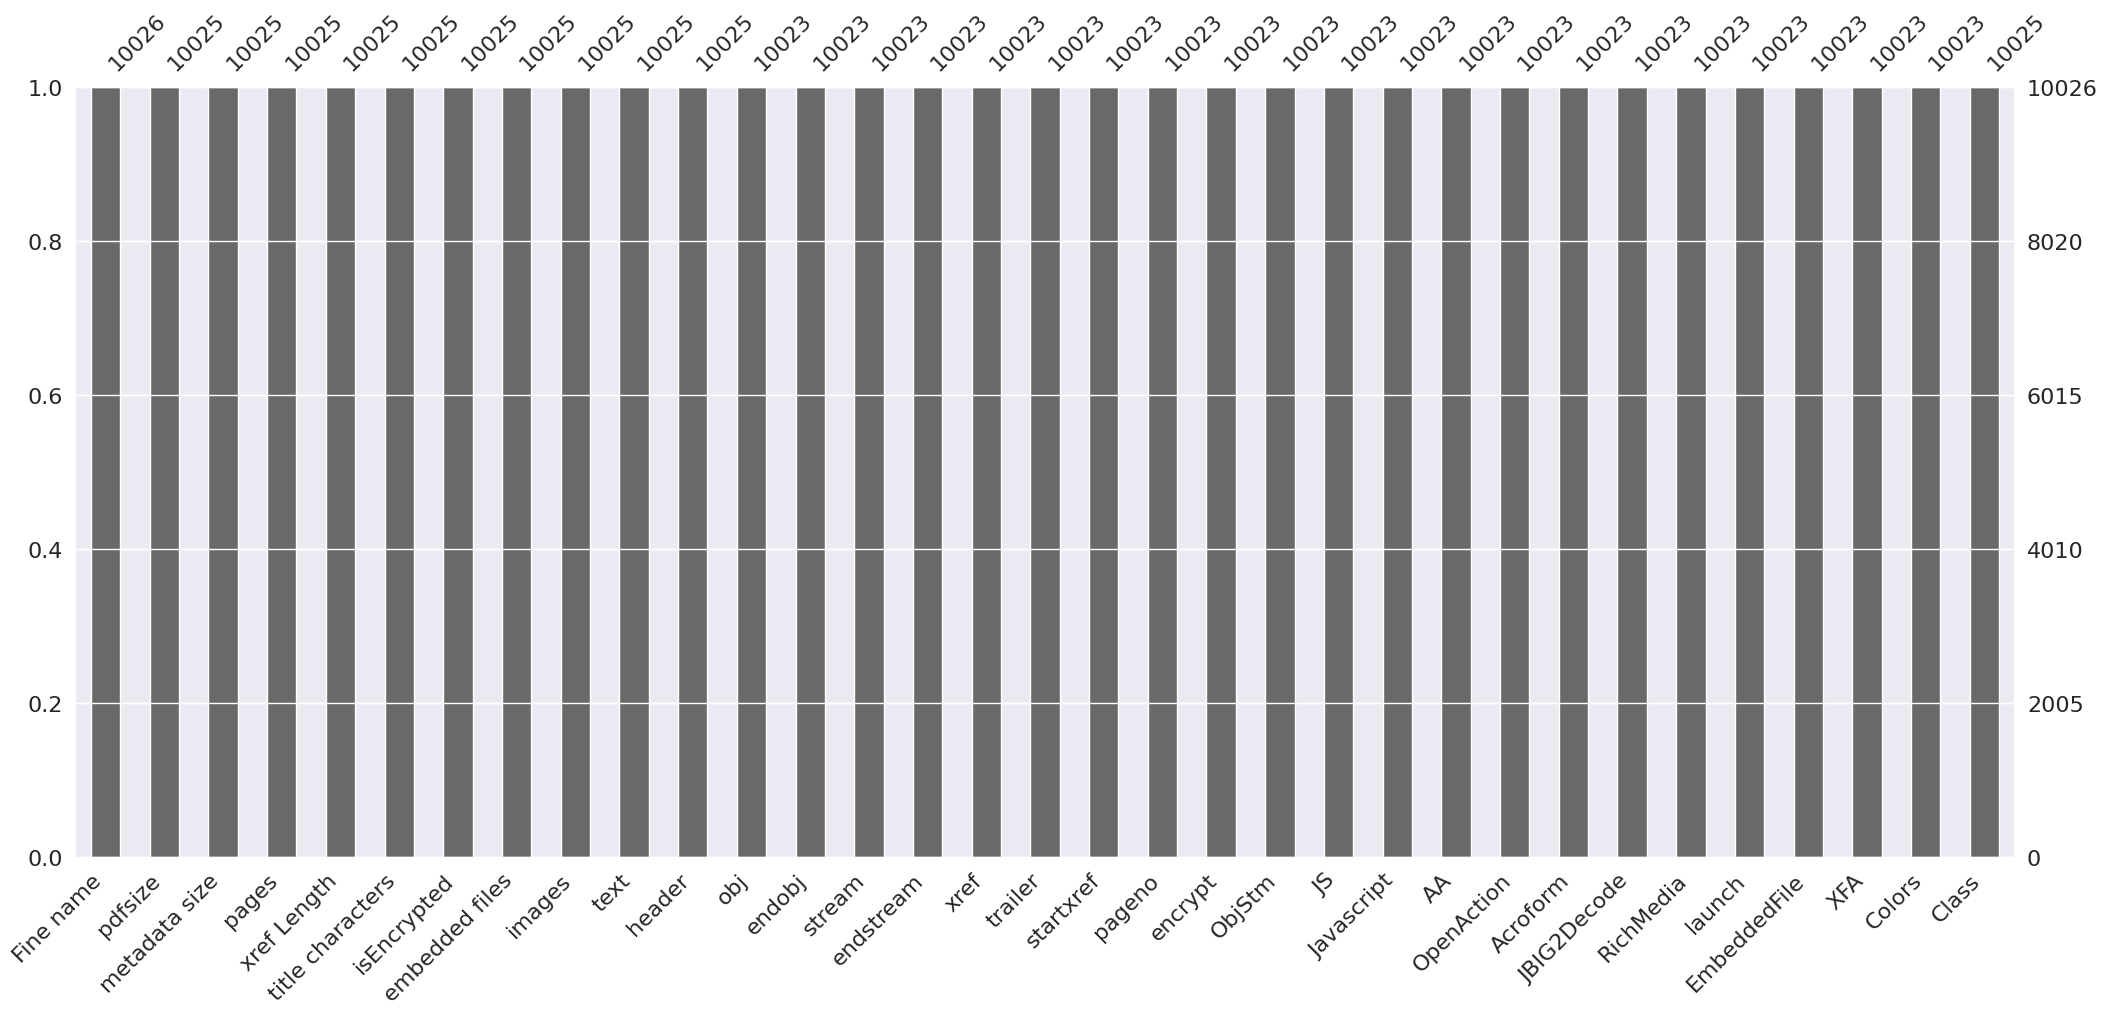

In [144]:
# Code Here (Add as many cells as you need)
# Code Here (Add as many cells as you need)
msno.bar(pdf)
plt.show()

#### Dealing with missing values (How would you deal with missing values?) (Columns with missing data)



1.   Do analysis using plots

2.   Provide an appropriate discussion




In [145]:
# Code Here (Add as many cells as you need)
pdf.dropna(inplace=True)
print(pdf.shape)
pdf.head()

(10023, 33)


,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,obj,endobj,stream,endstream,xref,trailer,startxref,pageno,encrypt,ObjStm,JS,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,10,10,3.0,3,1,1.0,1,1,0.0,0.0,1,1,0,1,0,0,0,0,0,0,0.0,Malicious
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,\t%PDF-1.6,19,19,9.0,9,1,1.0,1,1,0.0,0.0,0,0,0,0,1,0,0,0,8,1,0.0,Malicious
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,\t%PDF-1.3,12,12,3.0,3,1,1.0,1,2,0.0,0.0,1,2,0,1,0,0,0,0,0,0,0.0,Malicious
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,14,14,2.0,2,1,1.0,1,1,0.0,0.0,2,3,0,1,1,0,0,0,0,0,0.0,Malicious
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,\t%PDF-1.3,15,15,4.0,4,1,1.0,1,3,0.0,0.0,1,2,0,1,0,0,0,0,0,0,0.0,Malicious


In [146]:
#print(pdf.JS.value_counts())
p = pdf.copy()

mode = p['JS'].mode()[0]
p['JS'] = p['JS'].astype(str)
p['JS'] = p['JS'].str.replace('[^0-9.]', mode)
p['JS'] = pd.to_numeric(p['JS'])

mode = p['EmbeddedFile'].mode()[0]
p['EmbeddedFile'] = p['EmbeddedFile'].astype(str)
p['EmbeddedFile'] = p['EmbeddedFile'].str.replace('[^0-9.]', mode)
p['EmbeddedFile'] = pd.to_numeric(p['EmbeddedFile'])

mode = p['Javascript'].mode()[0]
p['Javascript'] = p['Javascript'].astype(str)
p['Javascript'] = p['Javascript'].str.replace('[^0-9.]', mode)
p['Javascript'] = pd.to_numeric(p['Javascript'])

mode = p['AA'].mode()[0]
p['AA'] = p['AA'].astype(str)
p['AA'] = p['AA'].str.replace('[^0-9.]', mode)
p['AA'] = pd.to_numeric(p['AA'])

mode = p['images'].mode()[0]
p['images'] = p['images'].astype(str)
p['images'] = p['images'].str.replace('[^0-9.]', mode)
p['images'] = pd.to_numeric(p['images'])

mode = p['obj'].mode()[0]
p['obj'] = p['obj'].astype(str)
p['obj'] = p['obj'].str.replace('[^0-9.]', mode)
p['obj'] = pd.to_numeric(p['obj'])

mode = p['endobj'].mode()[0]
p['endobj'] = p['endobj'].astype(str)
p['endobj'] = p['endobj'].str.replace('[^0-9.]', mode)
p['endobj'] = pd.to_numeric(p['endobj'])

mode = p['endstream'].mode()[0]
p['endstream'] = p['endstream'].astype(str)
p['endstream'] = p['endstream'].str.replace('[^0-9.]', mode)
p['endstream'] = pd.to_numeric(p['endstream'])

mode = p['OpenAction'].mode()[0]
p['OpenAction'] = p['OpenAction'].astype(str)
p['OpenAction'] = p['OpenAction'].str.replace('[^0-9.]', mode)
p['OpenAction'] = pd.to_numeric(p['OpenAction'])

mode = p['Acroform'].mode()[0]
p['Acroform'] = p['Acroform'].astype(str)
p['Acroform'] = p['Acroform'].str.replace('[^0-9.]', mode)
p['Acroform'] = pd.to_numeric(p['Acroform'])

mode = p['RichMedia'].mode()[0]
p['RichMedia'] = p['RichMedia'].astype(str)
p['RichMedia'] = p['RichMedia'].str.replace('[^0-9.]', mode)
p['RichMedia'] = pd.to_numeric(p['RichMedia'])


mode = p['JBIG2Decode'].mode()[0]
p['JBIG2Decode'] = p['JBIG2Decode'].astype(str)
p['JBIG2Decode'] = p['JBIG2Decode'].str.replace('[^0-9.]', mode)
p['JBIG2Decode'] = pd.to_numeric(p['JBIG2Decode'])

mode = p['launch'].mode()[0]
p['launch'] = p['launch'].astype(str)
p['launch'] = p['launch'].str.replace('[^0-9.]', mode)
p['launch'] = pd.to_numeric(p['launch'])

mode = p['XFA'].mode()[0]
p['XFA'] = p['XFA'].astype(str)
p['XFA'] = p['XFA'].str.replace('[^0-9.]', mode)
p['XFA'] = pd.to_numeric(p['XFA'])

mode = p['xref'].mode()[0]
p['xref'] = p['xref'].astype(str)
p['xref'] = p['xref'].str.replace('[^0-9.]', mode)
p['xref'] = pd.to_numeric(p['xref'])



mode = p['startxref'].mode()[0]
p['startxref'] = p['startxref'].astype(str)
p['startxref'] = p['startxref'].str.replace('[^0-9.]', mode)
p['startxref'] = pd.to_numeric(p['startxref'])

mode = p['pageno'].mode()[0]
p['pageno'] = p['pageno'].astype(str)
p['pageno'] = p['pageno'].str.replace('[^0-9.]', mode)
p['pageno'] = pd.to_numeric(p['pageno'])


<ipython-input-146-4cbe2ffdfeb8>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  p['JS'] = p['JS'].str.replace('[^0-9.]', mode)
<ipython-input-146-4cbe2ffdfeb8>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  p['EmbeddedFile'] = p['EmbeddedFile'].str.replace('[^0-9.]', mode)
<ipython-input-146-4cbe2ffdfeb8>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  p['Javascript'] = p['Javascript'].str.replace('[^0-9.]', mode)
<ipython-input-146-4cbe2ffdfeb8>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  p['AA'] = p['AA'].str.replace('[^0-9.]', mode)
<ipython-input-146-4cbe2ffdfeb8>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  p['images'] = p['images'].str.replace('[^0-9.]', mode)
<ipython-input-146-4cbe2ffdfeb8>:31: FutureWarning: The d

In [147]:
print(p.shape)
print(p.dtypes)

(10023, 33)
Fine name            object
pdfsize             float64
metadata size       float64
pages               float64
xref Length         float64
title characters    float64
isEncrypted         float64
embedded files      float64
images                int64
text                 object
header               object
obj                   int64
endobj              float64
stream              float64
endstream             int64
xref                float64
trailer             float64
startxref             int64
pageno                int64
encrypt             float64
ObjStm              float64
JS                    int64
Javascript            int64
AA                    int64
OpenAction            int64
Acroform              int64
JBIG2Decode           int64
RichMedia             int64
launch                int64
EmbeddedFile          int64
XFA                   int64
Colors              float64
Class                object
dtype: object


### 2.3 Analysing Patterns using Visualisations

#### Visualization of column correlation. Also, plot Heat Map

<ipython-input-148-0178d3fdde9a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = pdf.corr()


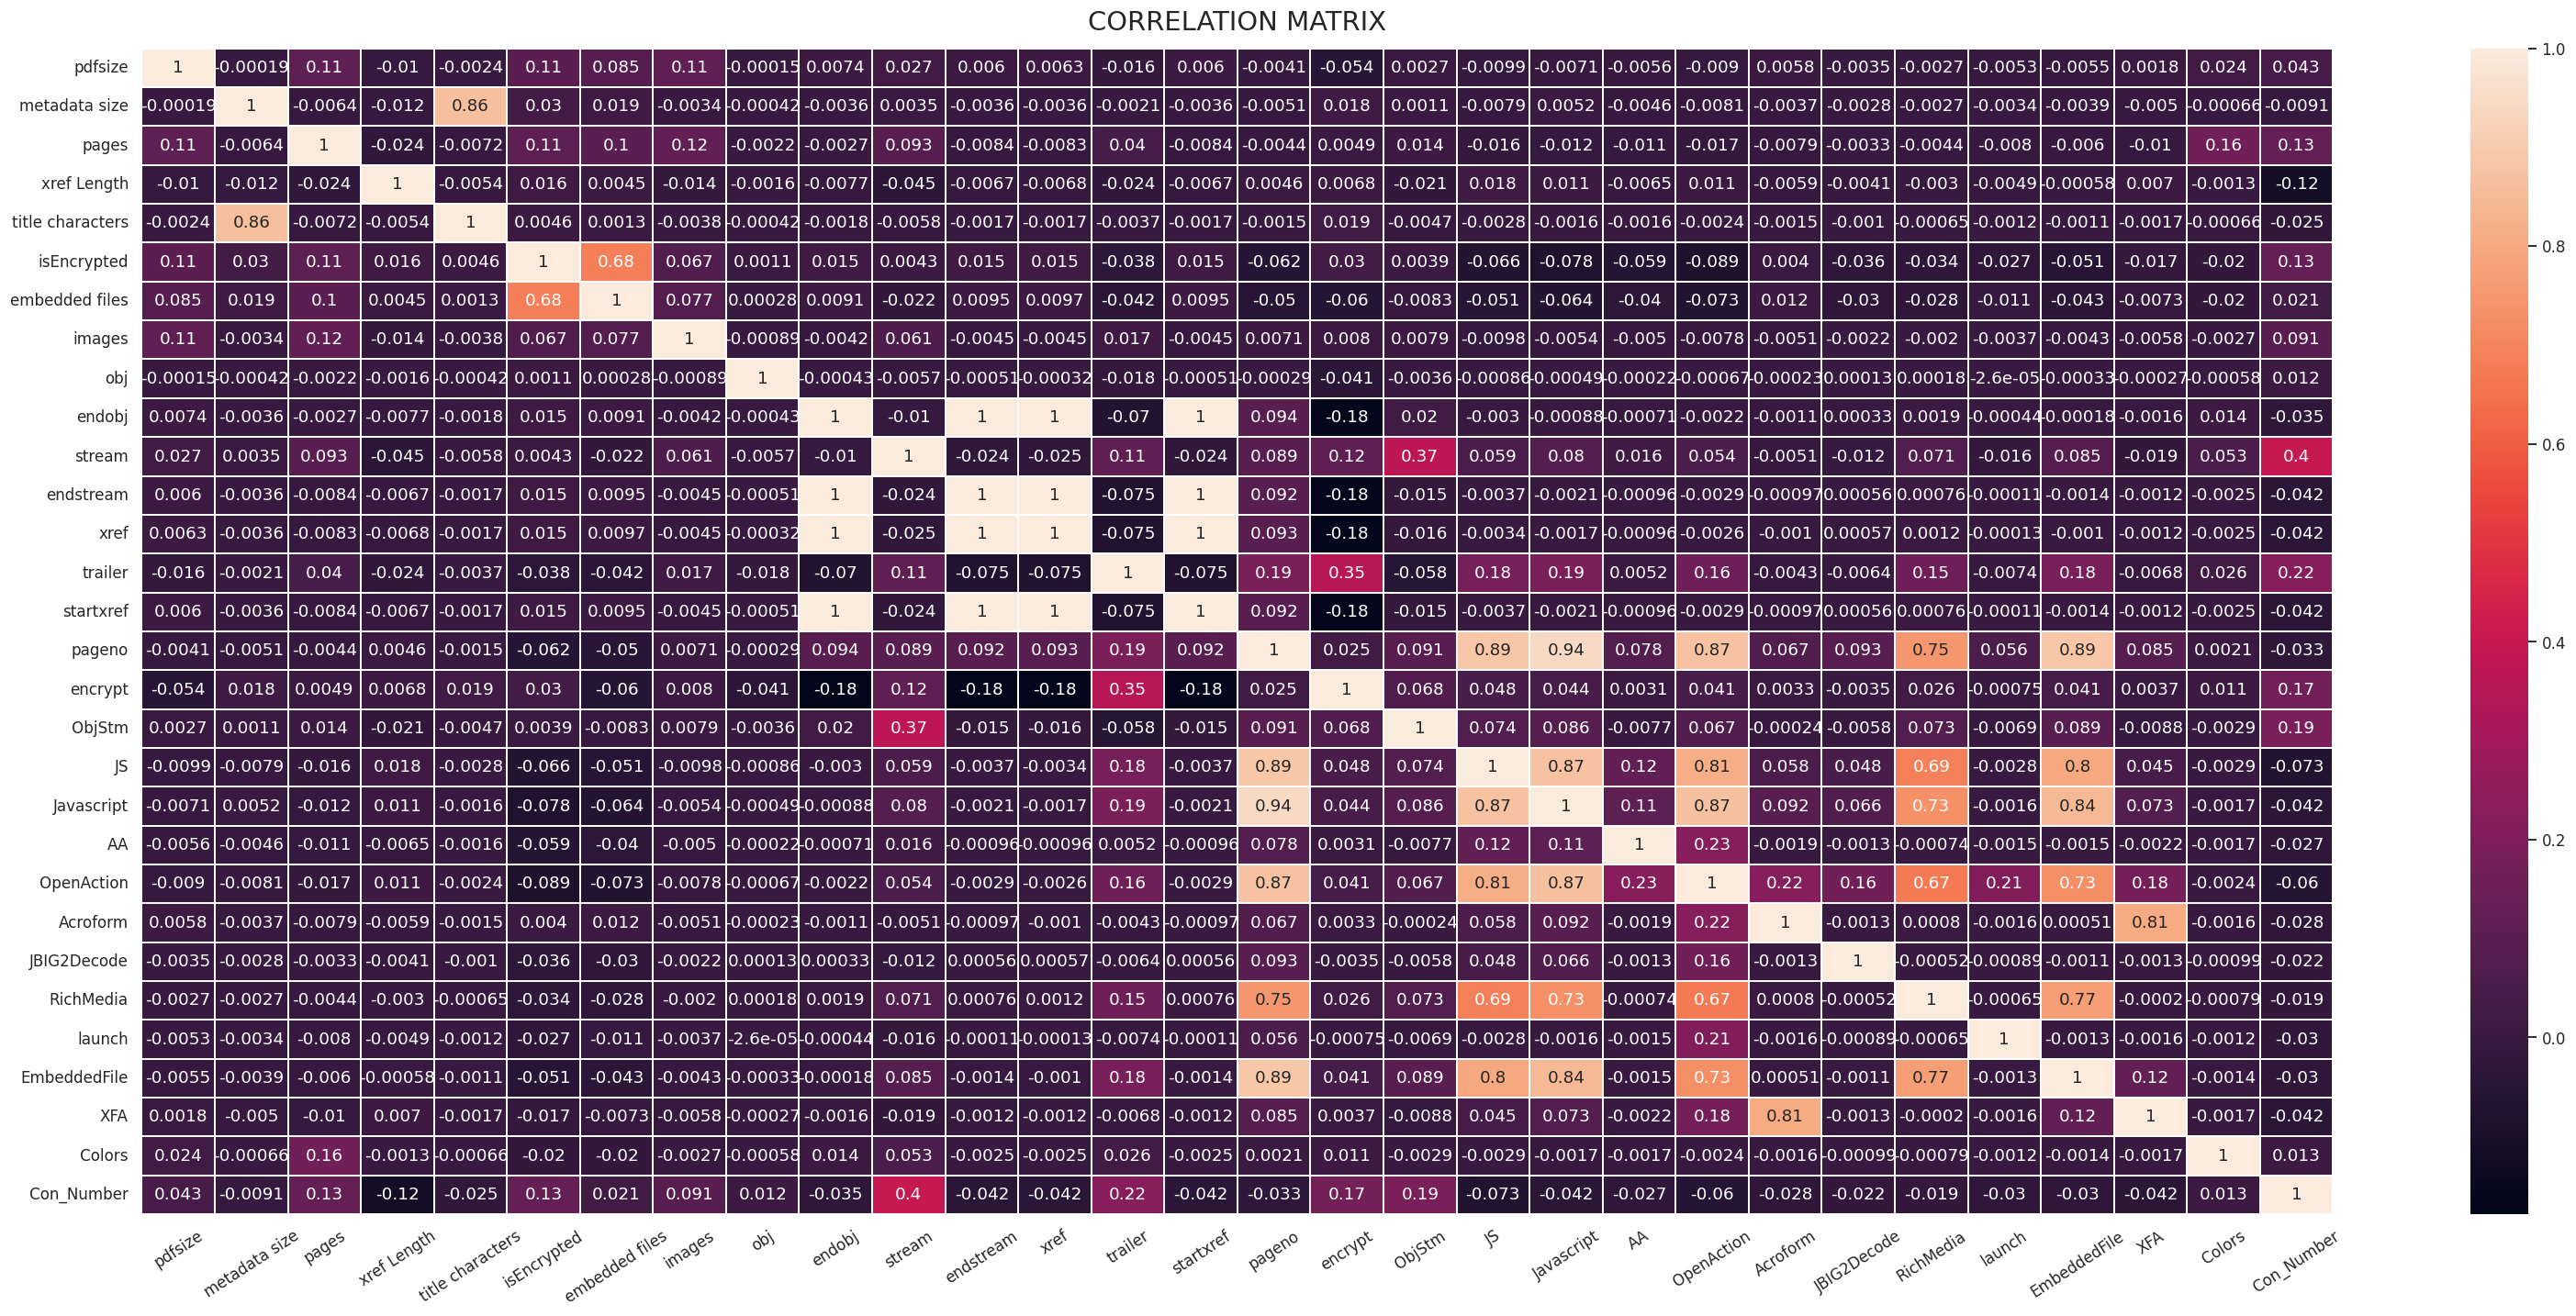

In [148]:
# Code Here (Add as many cells as you need)
pdf = p.copy()
pdf['Con_Number'] = np.where((pdf['Class'] == "Benign"), 1, 0)
correlation = pdf.corr()
correlation
plt.figure(figsize=(35,15), dpi=110)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xticks(rotation=33)
plt.show()

#### Visualization of Linear Relationships of columns (Continuous Numerical Variables)

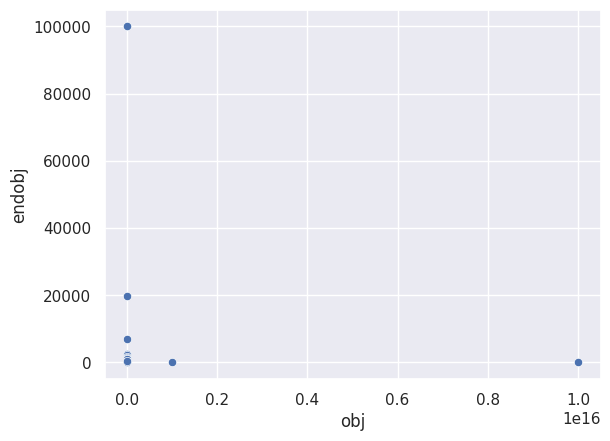

In [149]:
# Code Here (Add as many cells as you need)
sns.scatterplot(x=pdf["obj"], y=pdf["endobj"], data=df)
plt.show()


#### Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



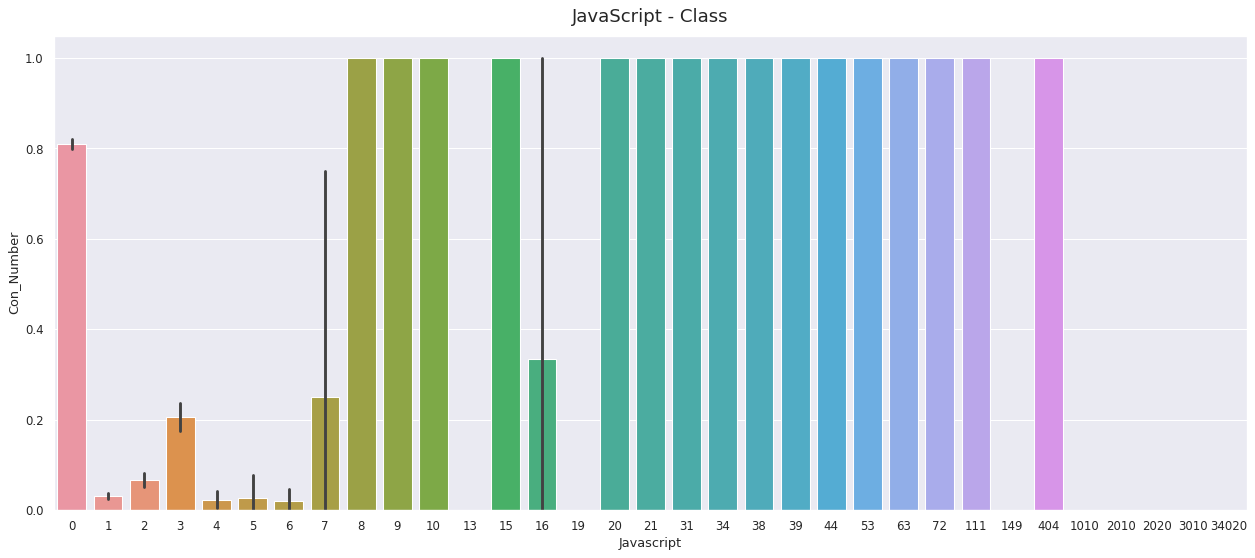

In [173]:

plt.figure(figsize=(20,8), dpi=77)
sns.barplot(x="Javascript", y="Con_Number", data=pdf)
plt.title("JavaScript - Class", size=17, pad=13 )
plt.show()

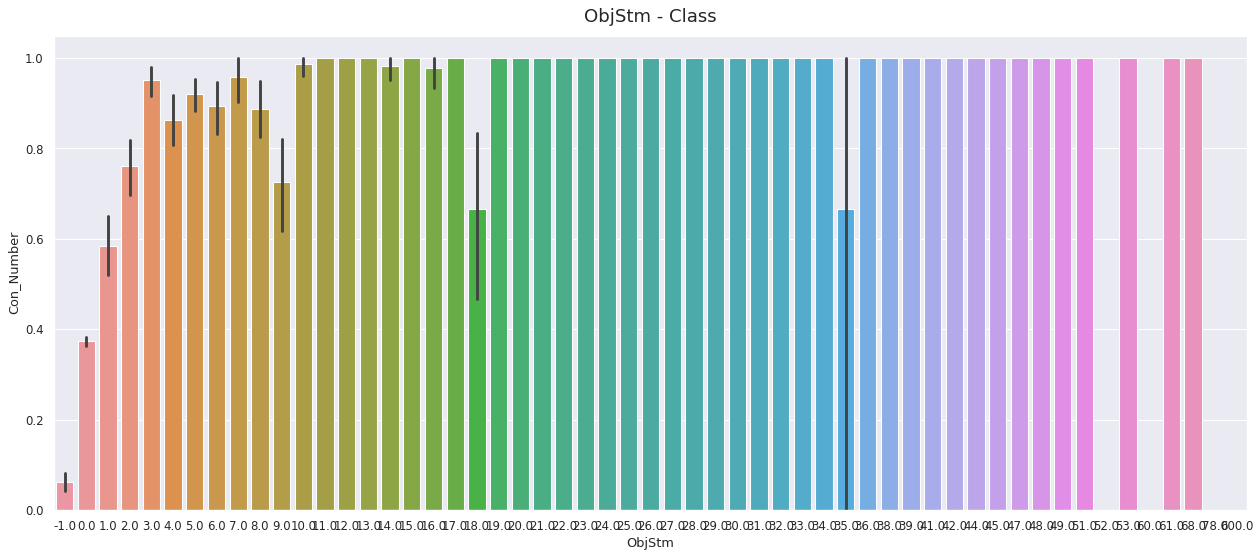

In [172]:
plt.figure(figsize=(20,8), dpi=77)
sns.barplot(x="ObjStm", y="Con_Number", data=pdf)
plt.title("ObjStm - Class", size=17, pad=13 )
plt.show()

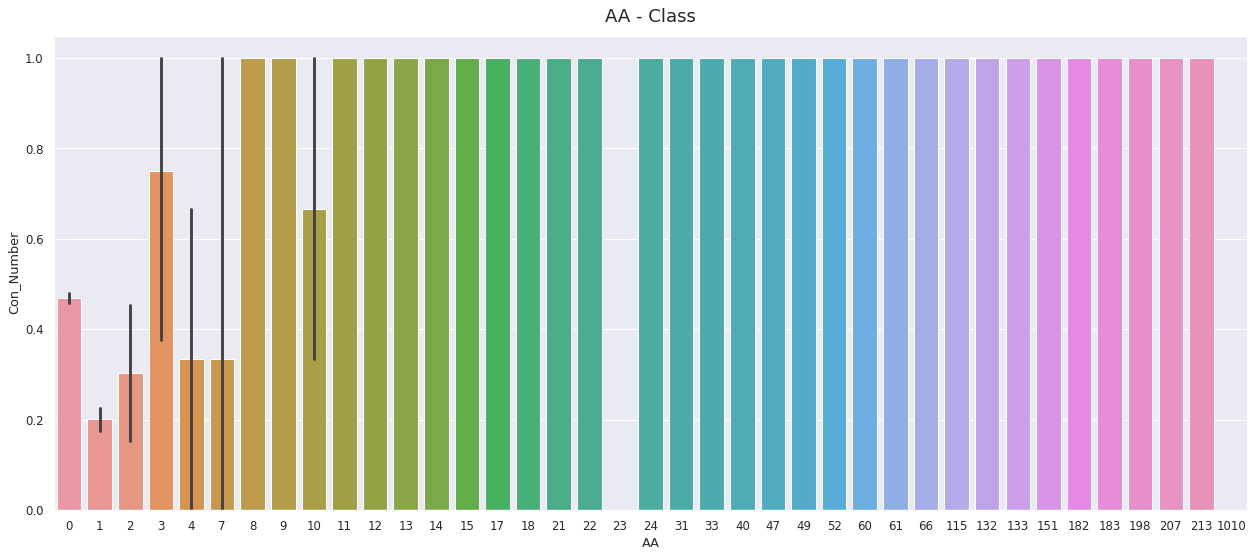

In [171]:
plt.figure(figsize=(20,8), dpi=77)
sns.barplot(x="AA", y="Con_Number", data=pdf)
plt.title("AA - Class", size=17, pad=13 )
plt.show()

#### Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



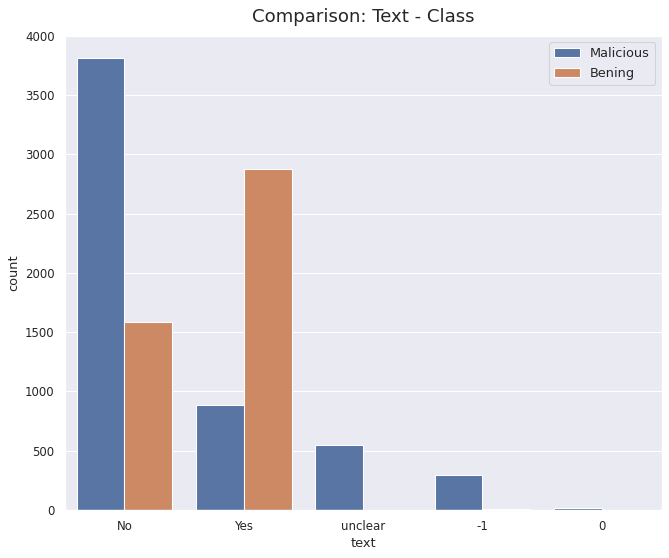

In [174]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=pdf['text'],hue=pdf['Con_Number'])
plt.title("Comparison: Text - Class", size=17, pad= 13)
plt.legend(['Malicious', 'Bening'], loc='upper right', prop={'size': 12})
plt.show()

## 3. Data Preprocessing

Explain your data preprocessing steps including filling null values, dropping duplicates, encoding, dimensionality reduction etc. whichever is applicable. Appropriate data preprocessing can hugely impact your model’s performance.

In [150]:
# Code Here (Add as many cells as you need)
pdf_data = pdf.copy()
pdf_data

,Fine name,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,header,obj,endobj,stream,endstream,xref,trailer,startxref,pageno,encrypt,ObjStm,JS,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class,Con_Number
0,aedaf3c5428a2e3ba600c44b96ad78dfdf8ed76e7df129...,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,10,10.0,3.0,3,1.0,1.0,1,1,0.0,0.0,1,1,0,1,0,0,0,0,0,0,0.0,Malicious,0
1,fe767fb2584a10c010626263ea950643ac25f6ca24628f...,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,\t%PDF-1.6,19,19.0,9.0,9,1.0,1.0,1,1,0.0,0.0,0,0,0,0,1,0,0,0,8,1,0.0,Malicious,0
2,544c5223ee301affad514b6fa585b3191625aba0a7222b...,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,\t%PDF-1.3,12,12.0,3.0,3,1.0,1.0,1,2,0.0,0.0,1,2,0,1,0,0,0,0,0,0,0.0,Malicious,0
3,669772e626deccb9cfb7eb6a61e13d248d0ea08f1abe15...,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,\t%PDF-1.3,14,14.0,2.0,2,1.0,1.0,1,1,0.0,0.0,2,3,0,1,1,0,0,0,0,0,0.0,Malicious,0
4,e434c884f45a691b0bf33d765f61794007eb0b8bb9f590...,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,\t%PDF-1.3,15,15.0,4.0,4,1.0,1.0,1,3,0.0,0.0,1,2,0,1,0,0,0,0,0,0,0.0,Malicious,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,908f8e3411d1bdf5e0fa7ca953c85cc4f133729fd4c71a...,529.0,296.0,1.0,87.0,8.0,0.0,0.0,3,No,\t%PDF-1.3,9,9.0,3.0,3,1.0,1.0,1,1,0.0,0.0,1,1,0,1,0,0,0,0,0,0,0.0,Malicious,0
10022,72654b36f6a240d953a9ce3e898a4dfa381031ba7f5e2a...,73.0,314.0,1.0,16.0,3.0,0.0,0.0,1,unclear,\t%PDF-\x07.3,8,7.0,2.0,2,1.0,1.0,1,1,0.0,0.0,1010,1,0,1,0,0,0,0,0,0,0.0,Malicious,0
10023,dad02289bc442e235961f4cf87cbde364a2250bdc57632...,4.0,377.0,2.0,13.0,11.0,0.0,0.0,0,Yes,\t%PDF-1.3,8,8.0,2.0,2,1.0,1.0,1,1,0.0,0.0,1,1,0,1,0,0,0,0,0,0,0.0,Malicious,0
10024,b219390e223ea263476d65277d00804cfd0a93023e1903...,38.0,338.0,1.0,200006.0,13.0,0.0,0.0,0,Yes,\t%PDF-1.3,9,9.0,3.0,3,1.0,1.0,1,1,0.0,0.0,1,1,0,1,0,0,0,0,0,0,0.0,Malicious,0


In [151]:
train2 = pdf_data.copy()
train2.drop(columns=['Fine name', 'header', 'Class', 'Colors'],inplace=True)
train2.head()

,pdfsize,metadata size,pages,xref Length,title characters,isEncrypted,embedded files,images,text,obj,endobj,stream,endstream,xref,trailer,startxref,pageno,encrypt,ObjStm,JS,Javascript,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Con_Number
0,8.0,180.0,1.0,11.0,0.0,0.0,0.0,0,No,10,10.0,3.0,3,1.0,1.0,1,1,0.0,0.0,1,1,0,1,0,0,0,0,0,0,0
1,15.0,224.0,0.0,20.0,7.0,0.0,0.0,0,No,19,19.0,9.0,9,1.0,1.0,1,1,0.0,0.0,0,0,0,0,1,0,0,0,8,1,0
2,4.0,468.0,2.0,13.0,16.0,0.0,0.0,0,Yes,12,12.0,3.0,3,1.0,1.0,1,2,0.0,0.0,1,2,0,1,0,0,0,0,0,0,0
3,17.0,250.0,1.0,15.0,0.0,0.0,0.0,0,No,14,14.0,2.0,2,1.0,1.0,1,1,0.0,0.0,2,3,0,1,1,0,0,0,0,0,0
4,7.0,252.0,3.0,16.0,45.0,0.0,0.0,0,Yes,15,15.0,4.0,4,1.0,1.0,1,3,0.0,0.0,1,2,0,1,0,0,0,0,0,0,0


In [152]:
data2 = train2.copy()

data2 = pd.get_dummies(data2)

data2.head()
pd.set_option('display.max_columns', None)
print(data2)

       pdfsize  metadata size  pages  xref Length  title characters  \
0          8.0          180.0    1.0         11.0               0.0   
1         15.0          224.0    0.0         20.0               7.0   
2          4.0          468.0    2.0         13.0              16.0   
3         17.0          250.0    1.0         15.0               0.0   
4          7.0          252.0    3.0         16.0              45.0   
...        ...            ...    ...          ...               ...   
10021    529.0          296.0    1.0         87.0               8.0   
10022     73.0          314.0    1.0         16.0               3.0   
10023      4.0          377.0    2.0         13.0              11.0   
10024     38.0          338.0    1.0     200006.0              13.0   
10025      2.0          180.0    1.0         11.0               0.0   

       isEncrypted  embedded files  images  obj  endobj  stream  endstream  \
0              0.0             0.0       0   10    10.0     3.0      

### **Write Here**

## 4.	Machine Learning Models



1.   Develop machine learning models. 
2.   You may try changing different parameters to obtain better training 
accuracy.
3. At least two models (with different parameters)



Provide a brief description of the machine learning models you used. (Provide a detailed description of their parameter)

Don’t copy-paste directly from the Internet! Write in your own words.

In [153]:
# Code Here (Add as many cells as you need)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


X = data2[['pdfsize', 'pages', 'xref Length', 'title characters',
       'isEncrypted', 'embedded files', 'images', 'stream', 'xref', 'trailer', 'encrypt',
      'ObjStm', 'JS', 'AA', 'OpenAction', 'Acroform',
      'JBIG2Decode', 'RichMedia', 'launch', 'EmbeddedFile', 'XFA', 'text_-1', 'text_0', 'text_No', 'text_Yes',
      'text_unclear']]
y = data2[['Con_Number']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)
print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())



# Using tuned Parameter



      pdfsize  pages  xref Length  title characters  isEncrypted  \
1267      7.0    1.0         10.0               0.0          0.0   
9935     77.0    1.0         16.0               3.0          0.0   
7422     76.0    6.0        251.0              18.0          0.0   
2042      3.0    1.0         15.0               0.0          0.0   
1108     73.0    1.0         16.0              16.0          0.0   

      embedded files  images  stream  xref  trailer  encrypt  ObjStm  JS  AA  \
1267             0.0       0     3.0   1.0      1.0      0.0     0.0   1   0   
9935             0.0       1     2.0   1.0      1.0      0.0     0.0   1   0   
7422             0.0       0    68.0   0.0      0.0      0.0    18.0   0   0   
2042             0.0       0     1.0   1.0      1.0      0.0     0.0   1   0   
1108             0.0       1     3.0   1.0      1.0      0.0     0.0   1   0   

      OpenAction  Acroform  JBIG2Decode  RichMedia  launch  EmbeddedFile  XFA  \
1267           1         0   

[[ 2.96472401e-04  2.98861947e-03 -9.09512804e-05 -3.39331613e-03
   2.51118776e+00 -3.28266124e+00  7.66733346e-03  7.64755382e-02
  -2.06720456e-04  3.99762574e-01 -1.30067424e+00 -1.00965900e-01
  -7.94653944e-01  7.95199389e-01 -2.53871717e+00  5.26728498e-01
   1.55114962e+00  8.71218235e-01 -1.13128545e+00 -2.27835563e-01
  -3.46647128e+00 -3.54265450e+00 -4.06246019e-01  1.50293413e+00
   3.28670083e+00 -2.60261978e+00]]
[-2.24370959]
-----Results with train data-----
probabilities with test data: [[9.68961897e-01 3.10381033e-02]
 [9.99502464e-01 4.97536285e-04]
 [3.27538115e-02 9.67246188e-01]
 ...
 [9.61153712e-01 3.88462883e-02]
 [7.09160545e-02 9.29083945e-01]
 [1.00000000e+00 0.00000000e+00]]
Predicted values with train data: [0 0 1 ... 0 1 0]


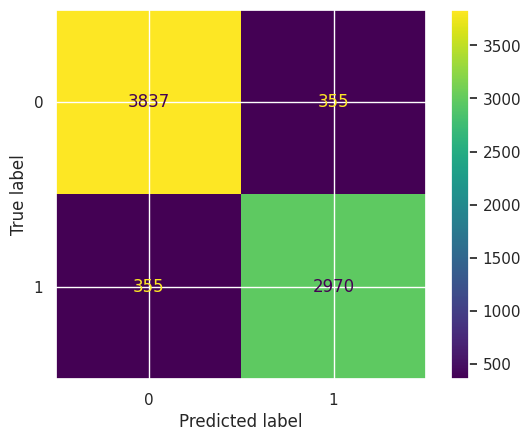

Report:                precision    recall  f1-score   support

           0       0.92      0.92      0.92      4192
           1       0.89      0.89      0.89      3325

    accuracy                           0.91      7517
   macro avg       0.90      0.90      0.90      7517
weighted avg       0.91      0.91      0.91      7517

Score:  0.9055474258347745
-----Results with test data-----
probabilities with test data: [[4.42808976e-02 9.55719102e-01]
 [2.25688252e-02 9.77431175e-01]
 [1.25779307e-04 9.99874221e-01]
 ...
 [1.84261499e-01 8.15738501e-01]
 [1.00000000e+00 0.00000000e+00]
 [5.04599174e-01 4.95400826e-01]]
Predicted values with test data: [1 1 1 ... 1 0 0]


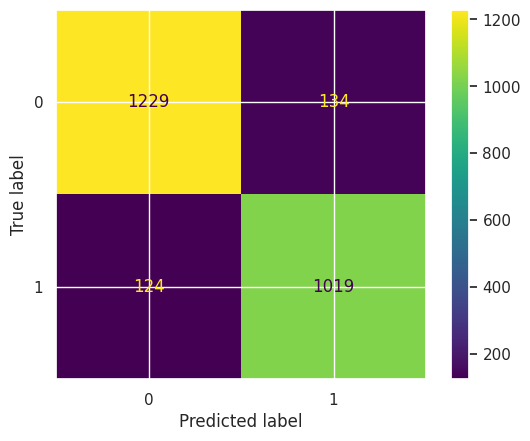

Report:                precision    recall  f1-score   support

           0       0.91      0.90      0.91      1363
           1       0.88      0.89      0.89      1143

    accuracy                           0.90      2506
   macro avg       0.90      0.90      0.90      2506
weighted avg       0.90      0.90      0.90      2506

Score:  0.897047086991221


In [158]:
# Using default Parameter LogisticRegression
regressor = LogisticRegression(max_iter = 10000)
regressor.fit(X_train, y_train.values.ravel())

print(regressor.coef_)
print(regressor.intercept_)

print('-----Results with train data-----')

probs_train = regressor.predict_proba(X_train)
print("probabilities with test data:",probs_train)

ypred_train = regressor.predict(X_train)
print("Predicted values with train data:", ypred_train)

cm_train = confusion_matrix(y_train, ypred_train, labels= regressor.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=regressor.classes_)
disp_train.plot()

plt.show()

r_train= classification_report(y_train, ypred_train)
print('Report: ',r_train)
print('Score: ', regressor.score(X_train, y_train))

print('-----Results with test data-----')

probs = regressor.predict_proba(X_test)
print("probabilities with test data:",probs)

ypred = regressor.predict(X_test)
print("Predicted values with test data:", ypred)

cm = confusion_matrix(y_test, ypred, labels= regressor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=regressor.classes_)
disp.plot()

plt.show()

r= classification_report(y_test, ypred)
print('Report: ',r)
print('Score: ', regressor.score(X_test, y_test))



Scores [0.9275266  0.90957447 0.89886893 0.91749834 0.90219561]
Score Mean 0.9111327876162569
Score min and max 0.8988689288090486 0.9275265957446809
-----Results with train data-----


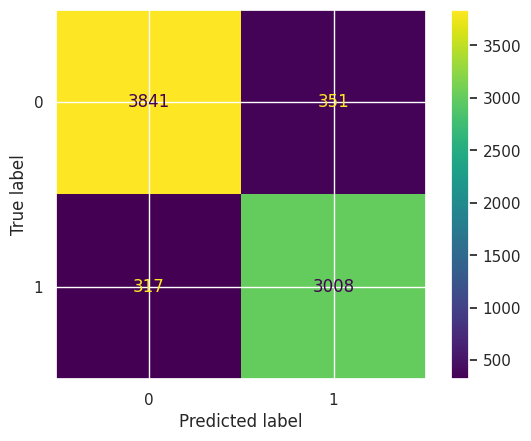

-----Results with test data-----


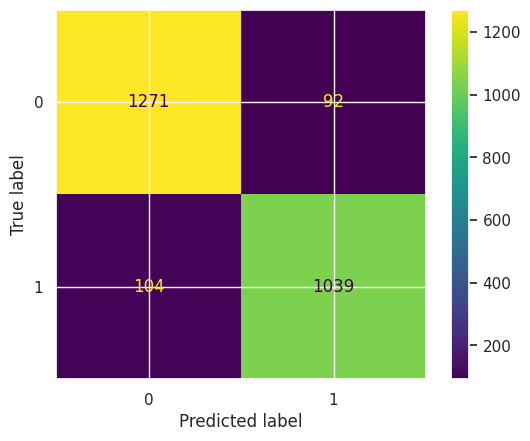

In [155]:
#Cross-validation with default Logistic regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cross_val_score = cross_val_score(regressor, X_train, y_train.values.ravel(), cv = 5)
print('Scores', cross_val_score)
print('Score Mean', cross_val_score.mean())
print('Score min and max', cross_val_score.min(), cross_val_score.max())

print('-----Results with train data-----')

y_pred_cv_train = cross_val_predict(regressor, X_train, y_train.values.ravel(), cv = 5)

cm_train_cv = confusion_matrix(y_train, y_pred_cv_train, labels= regressor.classes_)
disp_train_cv = ConfusionMatrixDisplay(confusion_matrix=cm_train_cv, display_labels=regressor.classes_)
disp_train_cv.plot()

plt.show()

print('-----Results with test data-----')

y_pred_cv_test = cross_val_predict(regressor, X_test, y_test.values.ravel(), cv = 5)

cm_test_cv = confusion_matrix(y_test, y_pred_cv_test, labels= regressor.classes_)
disp_test_cv = ConfusionMatrixDisplay(confusion_matrix=cm_test_cv, display_labels=regressor.classes_)
disp_test_cv.plot()

plt.show()


Best Parameters:  {'C': 100, 'max_iter': 15000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score:  0.9204443948981469


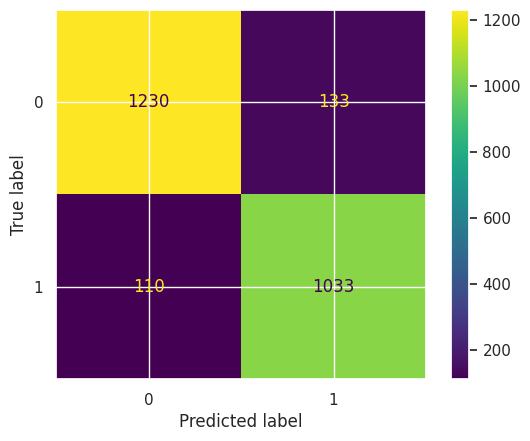

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1363
           1       0.89      0.90      0.89      1143

    accuracy                           0.90      2506
   macro avg       0.90      0.90      0.90      2506
weighted avg       0.90      0.90      0.90      2506



In [77]:
param_grid = {'penalty' : ['l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver' : ['lbfgs','sag','saga'],
              'max_iter' : [15000]}


lr = LogisticRegression()

grid_search = GridSearchCV(lr, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train.values.ravel())


lr_best = grid_search.best_estimator_

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

y_pred = lr_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels= lr_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_best.classes_)
disp.plot()

plt.show()

r= classification_report(y_test, y_pred)
print(r)

In [78]:
#linear regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print(linear_model.coef_)
print(linear_model.intercept_)

predicted_mal = linear_model.predict(X_test)
print("Predicted values:", predicted_mal)

mae = metrics.mean_absolute_error(y_test, predicted_mal)
mse = metrics.mean_squared_error(y_test, predicted_mal)
r2 = metrics.r2_score(y_test, predicted_mal)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is %.2f'% mae)
print('MSE is %.2f'% mse)
print('R2 score is %.2f'% r2)

[[ 1.18613062e-05  6.31620351e-04 -2.35891041e-06 -7.66308891e-06
   1.85915361e-02 -2.39650830e-01  1.44495708e-03  2.84043195e-03
   5.44578088e-08  6.46137124e-02  1.16609080e-01  2.33339436e-03
  -1.81286005e-04 -1.55346561e-04  1.05084125e-04 -9.79473955e-05
  -2.77924275e-04  3.25554563e-04 -3.53653507e-04 -3.39475275e-05
  -1.92460782e-04 -4.27133202e-01  4.69346062e-02  8.86766595e-02
   4.42267837e-01 -1.50745900e-01]]
[0.12926204]
Predicted values: [[0.75090539]
 [0.88027927]
 [1.08406486]
 ...
 [0.63953442]
 [0.46010911]
 [0.30332563]]
The model performance for testing set
--------------------------------------
MAE is 0.33
MSE is 0.16
R2 score is 0.36


In [79]:
linr = LinearRegression()
param_grid = {'fit_intercept': [True, False],
              'copy_X': [True, False]}
grid = GridSearchCV(linr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
linear_tunned_model = grid.best_estimator_
linear_tunned_model.fit(X_train, y_train)
y_pred = linear_tunned_model.predict(X_test)
print("Predicted values:", y_pred)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is %.2f'% mae)
print('MSE is %.2f'% mse)
print('R2 score is %.2f'% r2)

Predicted values: [[0.75090539]
 [0.88027927]
 [1.08406486]
 ...
 [0.63953442]
 [0.46010911]
 [0.30332563]]
The model performance for testing set
--------------------------------------
MAE is 0.33
MSE is 0.16
R2 score is 0.36


### **Write Here**

## 5.	Performance Evaluation and Discussion

Use charts and figures appropriately to visualize and compare the performance of different models. (Add as many cells as you need)

\

Analyze the performance of the models and provide your hypothesis behind their performance, e.g. Why are some models performing better than others? Provide appropriate reasoning for your hypothesis. 

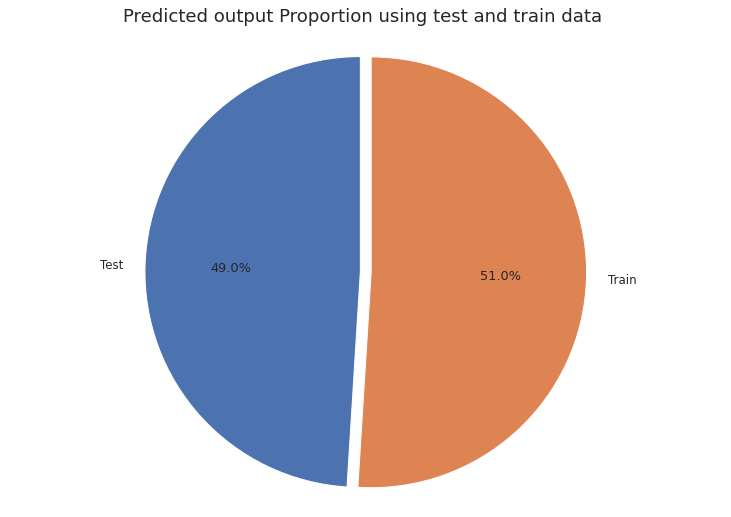

In [160]:
# Code Here (Add as many cells as you need)
proportions = [ypred_train.mean(),ypred.mean()]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels= ['Test', 'Train'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Predicted output Proportion using test and train data ", size=17, pad=13)
plt.show()

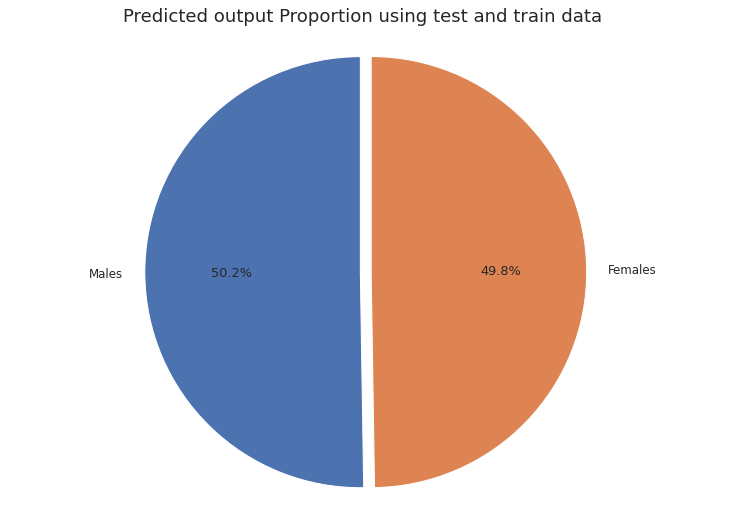

In [161]:
# Code Here (Add as many cells as you need)
proportions = [y_pred_cv_test.mean(),y_pred_cv_train.mean()]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels= ['Males', 'Females'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Predicted output Proportion using test and train data ", size=17, pad=13)
plt.show()


For logistic regression model with default perameter the score is 90% and the accuracy is also 90%. So the model is overfitted.

To cope up this proble we have used 5 fold cross validation.
The mean score after cross validation is 91% and min score is 90%.
The result didn't improved very well.

the positive prediction of the model for this test and train data is 90%